In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os
import glob
import time
from helperfunctions import *
from svmclassifier import *

In [2]:
# Read training data 
# Car
cars_files    = glob.glob('C://big/p5/vehicles/**/*.png', recursive=True)
# Not Car
notcars_files = glob.glob('C://big/p5/non-vehicles/**/*.png', recursive=True)

# store filenames in cars,notcars
cars=[]
notcars=[]
# search through readed data 
# read every third image to split time-series of images
for n in range(len(cars_files)):
    if n % 5 == 0:
        cars.append(cars_files[n])
#print(cars)

# Do the same for non-car data
for n in range(len(notcars_files)):
    if n % 5 == 0:
        notcars.append(notcars_files[n])
        
print('Cars size is: ',np.shape(cars))
print('Not-Cars size is: ',np.shape(notcars))

Cars size is:  (1759,)
Not-Cars size is:  (1794,)


C:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


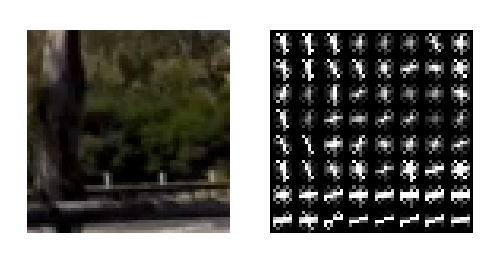

In [3]:
image = mpimg.imread('c:/big/p5/non-vehicles/Extras/extra3264.png')
%matplotlib inline
from skimage import data, color, exposure
from skimage.feature import hog

pix_per_cell = 8
cell_per_block = 2
orient = 9

features, hog_image = hog(image[:,:,0], orientations=orient, 
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), 
                          visualise=True, feature_vector=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image',color='white')
ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients',color='white')
ax1.set_adjustable('box-forced')
plt.show()

C:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


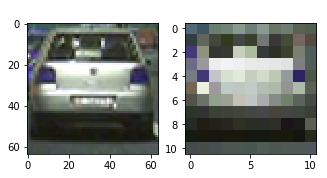

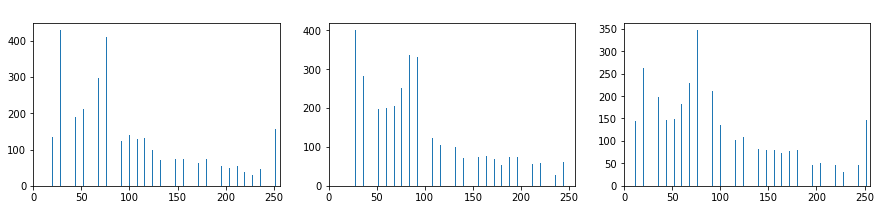

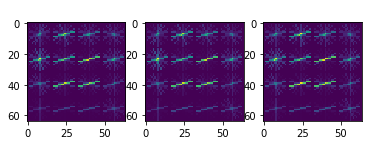

In [4]:
def binspatial(img, size, vis=False):
    '''Returns spatially bin features'''
    if vis == True:
        binspatial_features = cv2.resize(img, size)
    else:
        binspatial_features = cv2.resize(img, size).ravel()
    return binspatial_features

#Finds color histogram features
def color_hist(img , nbins, bins_range=(0,256), plot=False):
    '''Returns color histogram features or plots color histogram is flag set to True'''
    channel_1 = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel_2 = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel_3 = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    
    if plot == True:
        bin_edges = channel_1[1]
        bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2
        
        fig = plt.figure(figsize=(15,3))
        plt.subplot(131)
        plt.bar(bin_centers, channel_1[0])
        plt.xlim(0, 256)
        plt.title('Color Channel 1',color='white')
        plt.subplot(132)
        plt.bar(bin_centers, channel_2[0])
        plt.xlim(0, 256)
        plt.title('Color Channel 2',color='white')
        plt.subplot(133)
        plt.bar(bin_centers, channel_3[0])
        plt.xlim(0, 256)
        plt.title('Color Channel 3',color='white')
        
    elif plot == False:
        chist_features = np.concatenate((channel_1[0], channel_2[0], channel_3[0]))
        return chist_features
    
#Finds histogram of gradient features
def get_hog_features(img, orients, pixels_per_cell, cells_per_block, vis = False, feature_vec = True):
    '''Returns HOG features and/or HOG image'''
    if vis == True:
        features, hog_image = hog(img, orientations=orients, pixels_per_cell = pixels_per_cell,
                                  cells_per_block=cells_per_block, visualise=vis, 
                                  transform_sqrt=False, feature_vector=False)
        return features, hog_image 
    elif vis == False:
        features = hog(img, orientations=orients, pixels_per_cell=pixels_per_cell, 
                       cells_per_block=cells_per_block, visualise=vis, 
                       transform_sqrt=False, feature_vector=True)
    return features
    
image = cv2.imread('C:/big/p5/vehicles/GTI_MiddleClose/image0108.png')
lab_image = cv2.cvtColor(np.copy(image), cv2.COLOR_RGB2Lab)
lab_image = image
#Visualize Spatial Binning of Colors features
bin_spatial_image = binspatial(lab_image, size=(11,11), vis=True)
fig = plt.figure(figsize=(8,6))

plt.subplot(131)
plt.imshow(lab_image)
plt.title('Original Image', color='white')
plt.subplot(132)
plt.imshow(bin_spatial_image)
plt.title('Spatially Binned Image', color='white')

#Visualize Color Histogram features
color_hist(lab_image, nbins=32, bins_range=(0,256), plot=True)

#Visualize HOG Features
c1_feat, c1_img = get_hog_features(img=lab_image[:,:,0], orients=9, pixels_per_cell=(16,16), 
                                   cells_per_block=(2,2), vis = True, feature_vec = True)
c2_feat, c2_img = get_hog_features(img=lab_image[:,:,1], orients=9, pixels_per_cell=(16,16), 
                                   cells_per_block=(2,2), vis = True, feature_vec = True)
c3_feat, c3_img = get_hog_features(img=lab_image[:,:,2], orients=9, pixels_per_cell=(16,16), 
                                   cells_per_block=(2,2), vis = True, feature_vec = True)

fig = plt.figure(figsize=(6,6))

plt.subplot(131)
plt.imshow(c1_img)
plt.title('HOG Channel 1', color='white')
plt.subplot(132)
plt.imshow(c2_img)
plt.title('HOG Channel 2', color='white')
plt.subplot(133)
plt.imshow(c3_img)
plt.title('HOG Channel 3', color='white')

In [24]:
# Testing functions above - pickle_extracted_features()
cspace ='RGB'
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL'

# Extract the features, then save a pickle file
fname = 'X_scaled.p'
if os.path.isfile(fname) == True:
    print('Already Extracted, got my pickle')
    pass
else:
    pickle_extracted_features('X_scaled.p',cars,notcars,cspace,orient,
                          pix_per_cell,cell_per_block,hog_channel)

# Test training_with_SVM()
training_with_SVM('X_scaled.p')

Already Extracted, got my pickle
0.94 Seconds to train SVC
Test Accuracy of SVC =  0.9803
Model saved as [ svc.pickle ] file
My SVC predictions: 
 [ 0.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
For  10 labels: 
 [ 0.  0.  0.  1.  1.  0.  0.  0.  0.  0.]


In [25]:
# Pull in test Image
image = mpimg.imread('media/test_images/test3.jpg')

# Load the data and trained model weights
scaled_data = pickle.load(open(fname,'rb'))
svc = pickle.load(open('svc.pickle','rb'))    
X_scaler = scaled_data["X_scaler"]

ystart = 420
ystop = 700
scale = 1.5

input_directory = 'media/test_images/'
files = os.listdir(input_directory)
for file in files:
    filename,ext = os.path.splitext(file)
    if ext == '.jpg':
        image = mpimg.imread(input_directory + file)    

        win,img = find_cars(image, ystart, ystop, scale, svc, X_scaler,cspace, orient, 
                            pix_per_cell, cell_per_block)

    f,(ax1,ax2) = plt.subplots(1,2,figsize=(24,9))
    ax1.imshow(image)
    ax1.set_title('original image', fontsize=40)
    ax2.imshow(img)
    ax2.set_title('detected windows', fontsize=40)
    plt.show()
print("done")
print(win)



TypeError: 'int' object is not iterable

In [7]:
# test function above - find_cars
image = mpimg.imread('media/test_images/test3.jpg')

y_half = image.shape[0] // 2
y_end = image.shape[0] #- (y_half % 64)
ystart = [y_half,y_half+100]
ystop = [y_end-100, y_end]
scale = [0.8,1.5,2.5]
#ystart = [400]
#ystop = [700]
#scale = [1.5]
point_scale_data = np.vstack((ystart,ystop,scale))
print(point_scale_data)
windows = search_with_multiscale_windows(image, cspace, orient, pix_per_cell, cell_per_block, 
                                         point_scale_data)


print(windows)
print(len(windows))

[[ 360.   460. ]
 [ 620.   720. ]
 [   1.     2.3]]
search_with_multiscale cspace is  RGB


C:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[((8, 400), (72, 464)), ((88, 400), (152, 464)), ((88, 408), (152, 472)), ((96, 400), (160, 464)), ((104, 392), (168, 456)), ((104, 400), (168, 464)), ((128, 360), (192, 424)), ((152, 400), (216, 464)), ((160, 392), (224, 456)), ((168, 392), (232, 456)), ((168, 400), (232, 464)), ((176, 392), (240, 456)), ((184, 392), (248, 456)), ((440, 384), (504, 448)), ((872, 408), (936, 472)), ((872, 416), (936, 480)), ((880, 408), (944, 472)), ((888, 408), (952, 472)), ((888, 416), (952, 480)), ((896, 400), (960, 464)), ((896, 408), (960, 472)), ((896, 416), (960, 480)), ((896, 424), (960, 488)), ((904, 408), (968, 472)), ((904, 416), (968, 480)), ((912, 416), (976, 480))]
26


search_with_multiscale cspace is  YCrCb


C:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


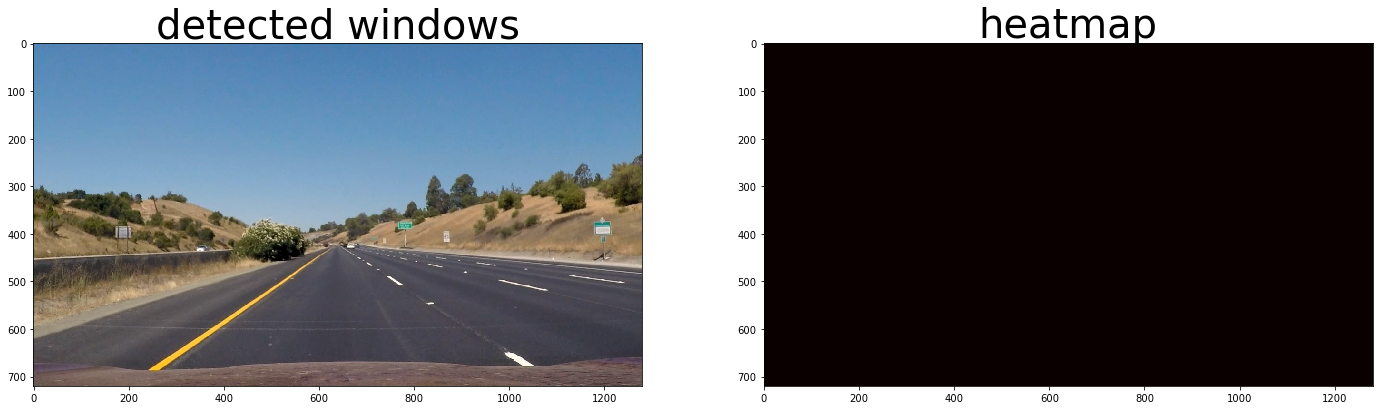

search_with_multiscale cspace is  YCrCb


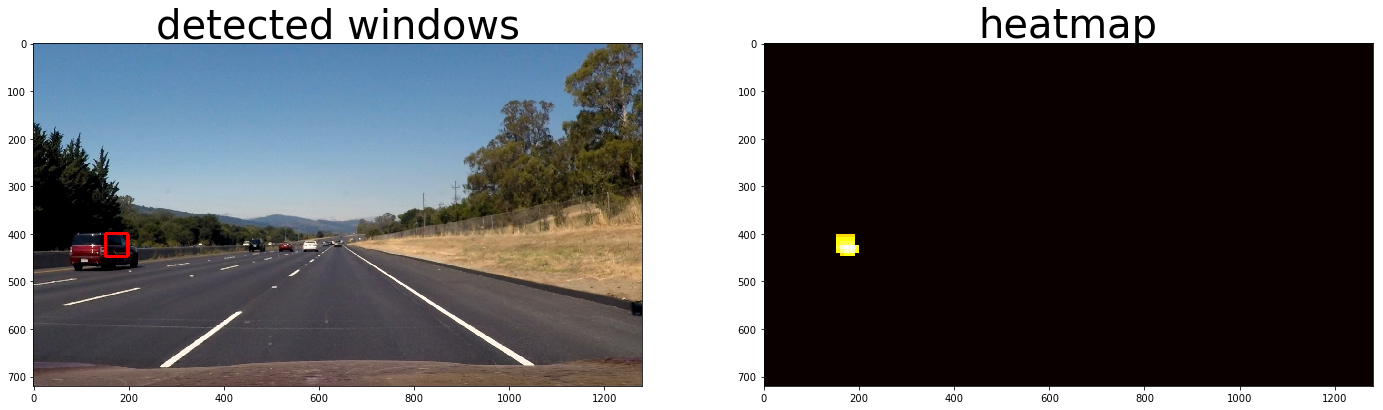

search_with_multiscale cspace is  YCrCb


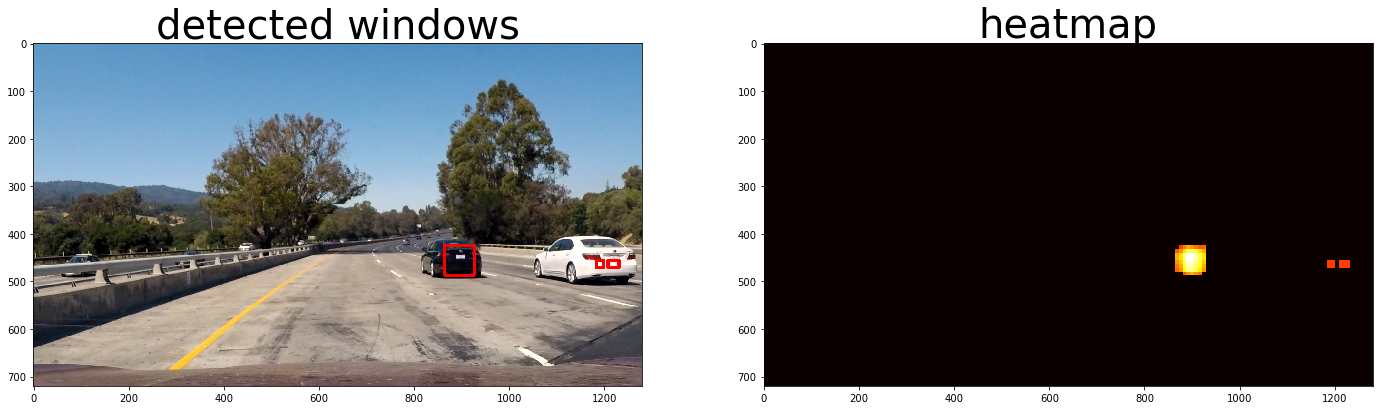

search_with_multiscale cspace is  YCrCb


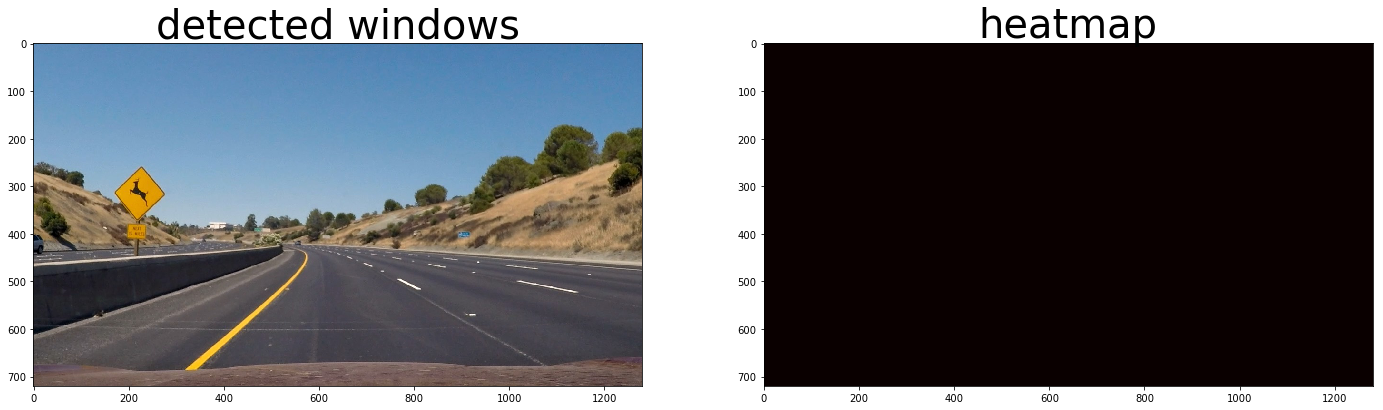

search_with_multiscale cspace is  YCrCb


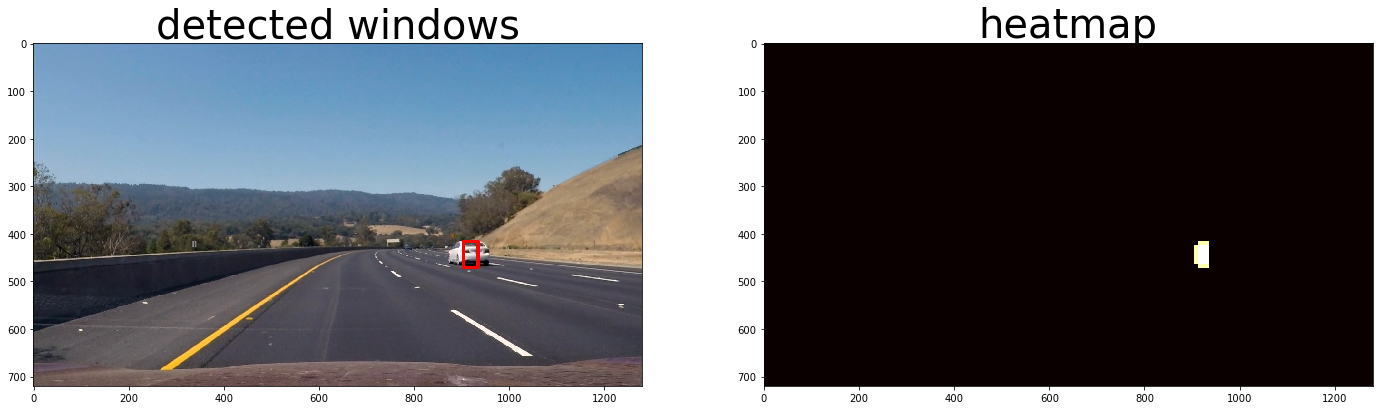

search_with_multiscale cspace is  YCrCb


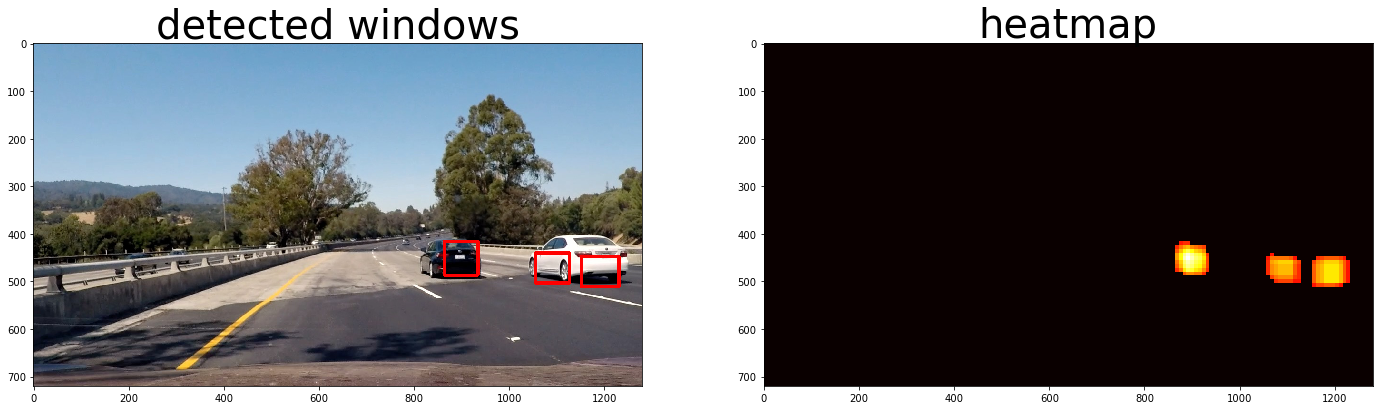

search_with_multiscale cspace is  YCrCb


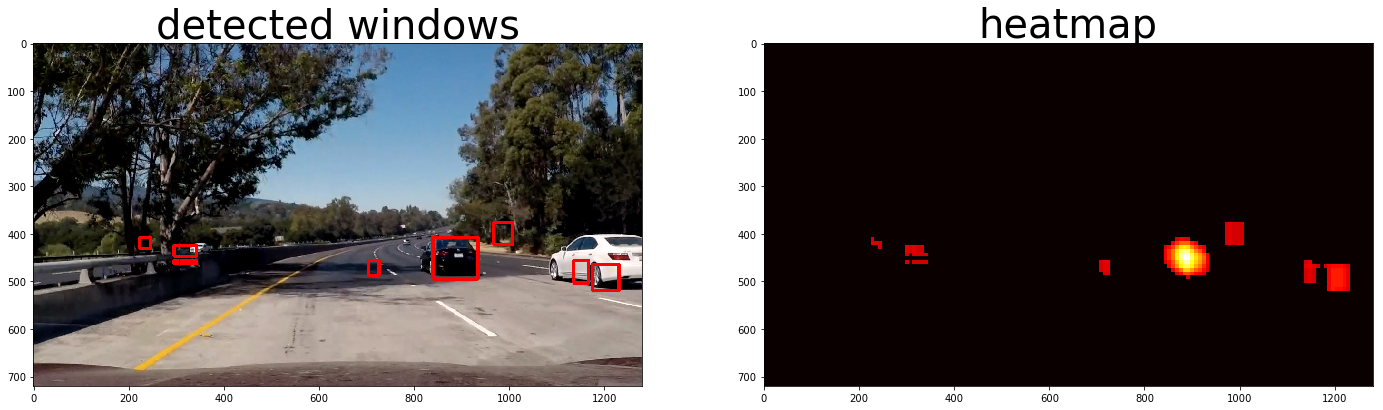

search_with_multiscale cspace is  YCrCb


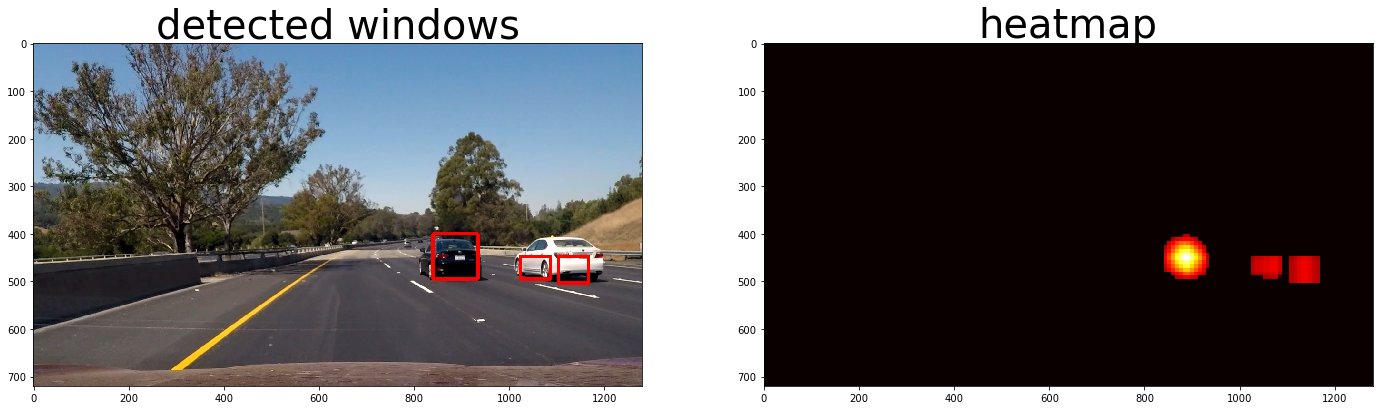

done


In [8]:


# test multiscale window search and heatmap
cspace = "YCrCb"
input_directory = 'media/test_images/'
files = os.listdir(input_directory)
for file in files:
    filename,ext = os.path.splitext(file)
    if ext == '.jpg':
        image = mpimg.imread(input_directory + file)    

        # When moving function to outside script, had to pass all the arguments
        # Not sure what side effects this caused
        img,heat = test_image(image,cspace,orient,pix_per_cell,cell_per_block,point_scale_data)

    f,(ax1,ax2) = plt.subplots(1,2,figsize=(24,9))
    ax1.imshow(img)
    ax1.set_title('detected windows', fontsize=40)
    ax2.imshow(heat, cmap='hot')
    ax2.set_title('heatmap', fontsize=40)
    plt.show()
print("done")


In [10]:
from collections import deque
from moviepy.editor import VideoFileClip

# test on short video
output_name = 'testing_video_thresh.mp4'
clip0 = VideoFileClip("media/project_video.mp4")
#clip0 = VideoFileClip("media/project_video.mp4").subclip(10,12)
clipping = clip0.fl_image(process_video)
%time clipping.write_videofile(output_name, audio=False)


search_with_multiscale cspace is  YCrCb
[MoviePy] >>>> Building video testing_video_thresh.mp4
[MoviePy] Writing video testing_video_thresh.mp4


  0%|                                                                                         | 0/1261 [00:00<?, ?it/s]

search_with_multiscale cspace is  YCrCb


  0%|                                                                               | 1/1261 [00:04<1:36:47,  4.61s/it]

search_with_multiscale cspace is  YCrCb


  0%|▏                                                                              | 2/1261 [00:09<1:36:34,  4.60s/it]

search_with_multiscale cspace is  YCrCb


  0%|▏                                                                              | 3/1261 [00:13<1:37:13,  4.64s/it]

search_with_multiscale cspace is  YCrCb


  0%|▎                                                                              | 4/1261 [00:18<1:36:55,  4.63s/it]

search_with_multiscale cspace is  YCrCb


  0%|▎                                                                              | 5/1261 [00:23<1:37:14,  4.65s/it]

search_with_multiscale cspace is  YCrCb


  0%|▍                                                                              | 6/1261 [00:27<1:38:05,  4.69s/it]

search_with_multiscale cspace is  YCrCb


  1%|▍                                                                              | 7/1261 [00:32<1:38:17,  4.70s/it]

search_with_multiscale cspace is  YCrCb


  1%|▌                                                                              | 8/1261 [00:37<1:38:27,  4.71s/it]

search_with_multiscale cspace is  YCrCb


  1%|▌                                                                              | 9/1261 [00:42<1:38:38,  4.73s/it]

search_with_multiscale cspace is  YCrCb


  1%|▌                                                                             | 10/1261 [00:46<1:38:19,  4.72s/it]

search_with_multiscale cspace is  YCrCb


  1%|▋                                                                             | 11/1261 [00:51<1:38:05,  4.71s/it]

search_with_multiscale cspace is  YCrCb


  1%|▋                                                                             | 12/1261 [00:56<1:37:09,  4.67s/it]

search_with_multiscale cspace is  YCrCb


  1%|▊                                                                             | 13/1261 [01:00<1:36:39,  4.65s/it]

search_with_multiscale cspace is  YCrCb


  1%|▊                                                                             | 14/1261 [01:05<1:36:30,  4.64s/it]

search_with_multiscale cspace is  YCrCb


  1%|▉                                                                             | 15/1261 [01:09<1:35:45,  4.61s/it]

search_with_multiscale cspace is  YCrCb


  1%|▉                                                                             | 16/1261 [01:14<1:35:25,  4.60s/it]

search_with_multiscale cspace is  YCrCb


  1%|█                                                                             | 17/1261 [01:19<1:35:06,  4.59s/it]

search_with_multiscale cspace is  YCrCb


  1%|█                                                                             | 18/1261 [01:23<1:35:06,  4.59s/it]

search_with_multiscale cspace is  YCrCb


  2%|█▏                                                                            | 19/1261 [01:28<1:34:45,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  2%|█▏                                                                            | 20/1261 [01:32<1:34:33,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  2%|█▎                                                                            | 21/1261 [01:37<1:34:22,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  2%|█▎                                                                            | 22/1261 [01:41<1:34:15,  4.56s/it]

search_with_multiscale cspace is  YCrCb


  2%|█▍                                                                            | 23/1261 [01:46<1:34:03,  4.56s/it]

search_with_multiscale cspace is  YCrCb


  2%|█▍                                                                            | 24/1261 [01:50<1:33:55,  4.56s/it]

search_with_multiscale cspace is  YCrCb


  2%|█▌                                                                            | 25/1261 [01:55<1:33:53,  4.56s/it]

search_with_multiscale cspace is  YCrCb


  2%|█▌                                                                            | 26/1261 [02:00<1:33:49,  4.56s/it]

search_with_multiscale cspace is  YCrCb


  2%|█▋                                                                            | 27/1261 [02:04<1:33:54,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  2%|█▋                                                                            | 28/1261 [02:09<1:33:50,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  2%|█▊                                                                            | 29/1261 [02:13<1:34:37,  4.61s/it]

search_with_multiscale cspace is  YCrCb


  2%|█▊                                                                            | 30/1261 [02:18<1:34:14,  4.59s/it]

search_with_multiscale cspace is  YCrCb


  2%|█▉                                                                            | 31/1261 [02:23<1:34:40,  4.62s/it]

search_with_multiscale cspace is  YCrCb


  3%|█▉                                                                            | 32/1261 [02:27<1:34:05,  4.59s/it]

search_with_multiscale cspace is  YCrCb


  3%|██                                                                            | 33/1261 [02:32<1:33:51,  4.59s/it]

search_with_multiscale cspace is  YCrCb


  3%|██                                                                            | 34/1261 [02:36<1:33:29,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  3%|██▏                                                                           | 35/1261 [02:41<1:33:15,  4.56s/it]

search_with_multiscale cspace is  YCrCb


  3%|██▏                                                                           | 36/1261 [02:46<1:34:04,  4.61s/it]

search_with_multiscale cspace is  YCrCb


  3%|██▎                                                                           | 37/1261 [02:50<1:33:36,  4.59s/it]

search_with_multiscale cspace is  YCrCb


  3%|██▎                                                                           | 38/1261 [02:55<1:33:33,  4.59s/it]

search_with_multiscale cspace is  YCrCb


  3%|██▍                                                                           | 39/1261 [02:59<1:33:24,  4.59s/it]

search_with_multiscale cspace is  YCrCb


  3%|██▍                                                                           | 40/1261 [03:04<1:33:14,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  3%|██▌                                                                           | 41/1261 [03:08<1:33:07,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  3%|██▌                                                                           | 42/1261 [03:13<1:32:55,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  3%|██▋                                                                           | 43/1261 [03:18<1:32:53,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  3%|██▋                                                                           | 44/1261 [03:22<1:32:43,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  4%|██▊                                                                           | 45/1261 [03:27<1:32:31,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  4%|██▊                                                                           | 46/1261 [03:31<1:32:27,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  4%|██▉                                                                           | 47/1261 [03:36<1:32:09,  4.55s/it]

search_with_multiscale cspace is  YCrCb


  4%|██▉                                                                           | 48/1261 [03:40<1:32:30,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  4%|███                                                                           | 49/1261 [03:45<1:32:11,  4.56s/it]

search_with_multiscale cspace is  YCrCb


  4%|███                                                                           | 50/1261 [03:50<1:33:01,  4.61s/it]

search_with_multiscale cspace is  YCrCb


  4%|███▏                                                                          | 51/1261 [03:54<1:33:01,  4.61s/it]

search_with_multiscale cspace is  YCrCb


  4%|███▏                                                                          | 52/1261 [03:59<1:32:53,  4.61s/it]

search_with_multiscale cspace is  YCrCb


  4%|███▎                                                                          | 53/1261 [04:03<1:32:24,  4.59s/it]

search_with_multiscale cspace is  YCrCb


  4%|███▎                                                                          | 54/1261 [04:08<1:32:36,  4.60s/it]

search_with_multiscale cspace is  YCrCb


  4%|███▍                                                                          | 55/1261 [04:13<1:33:19,  4.64s/it]

search_with_multiscale cspace is  YCrCb


  4%|███▍                                                                          | 56/1261 [04:17<1:33:01,  4.63s/it]

search_with_multiscale cspace is  YCrCb


  5%|███▌                                                                          | 57/1261 [04:22<1:33:43,  4.67s/it]

search_with_multiscale cspace is  YCrCb


  5%|███▌                                                                          | 58/1261 [04:27<1:32:53,  4.63s/it]

search_with_multiscale cspace is  YCrCb


  5%|███▋                                                                          | 59/1261 [04:31<1:32:08,  4.60s/it]

search_with_multiscale cspace is  YCrCb


  5%|███▋                                                                          | 60/1261 [04:36<1:31:53,  4.59s/it]

search_with_multiscale cspace is  YCrCb


  5%|███▊                                                                          | 61/1261 [04:40<1:32:14,  4.61s/it]

search_with_multiscale cspace is  YCrCb


  5%|███▊                                                                          | 62/1261 [04:45<1:32:03,  4.61s/it]

search_with_multiscale cspace is  YCrCb


  5%|███▉                                                                          | 63/1261 [04:50<1:31:55,  4.60s/it]

search_with_multiscale cspace is  YCrCb


  5%|███▉                                                                          | 64/1261 [04:54<1:31:49,  4.60s/it]

search_with_multiscale cspace is  YCrCb


  5%|████                                                                          | 65/1261 [04:59<1:31:26,  4.59s/it]

search_with_multiscale cspace is  YCrCb


  5%|████                                                                          | 66/1261 [05:03<1:31:14,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  5%|████▏                                                                         | 67/1261 [05:08<1:31:07,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  5%|████▏                                                                         | 68/1261 [05:13<1:30:58,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  5%|████▎                                                                         | 69/1261 [05:17<1:30:53,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  6%|████▎                                                                         | 70/1261 [05:22<1:30:49,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  6%|████▍                                                                         | 71/1261 [05:26<1:30:33,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  6%|████▍                                                                         | 72/1261 [05:31<1:30:14,  4.55s/it]

search_with_multiscale cspace is  YCrCb


  6%|████▌                                                                         | 73/1261 [05:35<1:30:13,  4.56s/it]

search_with_multiscale cspace is  YCrCb


  6%|████▌                                                                         | 74/1261 [05:40<1:29:59,  4.55s/it]

search_with_multiscale cspace is  YCrCb


  6%|████▋                                                                         | 75/1261 [05:44<1:30:07,  4.56s/it]

search_with_multiscale cspace is  YCrCb


  6%|████▋                                                                         | 76/1261 [05:49<1:30:04,  4.56s/it]

search_with_multiscale cspace is  YCrCb


  6%|████▊                                                                         | 77/1261 [05:54<1:29:42,  4.55s/it]

search_with_multiscale cspace is  YCrCb


  6%|████▊                                                                         | 78/1261 [05:58<1:29:35,  4.54s/it]

search_with_multiscale cspace is  YCrCb


  6%|████▉                                                                         | 79/1261 [06:03<1:29:41,  4.55s/it]

search_with_multiscale cspace is  YCrCb


  6%|████▉                                                                         | 80/1261 [06:07<1:29:14,  4.53s/it]

search_with_multiscale cspace is  YCrCb


  6%|█████                                                                         | 81/1261 [06:12<1:29:17,  4.54s/it]

search_with_multiscale cspace is  YCrCb


  7%|█████                                                                         | 82/1261 [06:16<1:30:19,  4.60s/it]

search_with_multiscale cspace is  YCrCb


  7%|█████▏                                                                        | 83/1261 [06:21<1:30:29,  4.61s/it]

search_with_multiscale cspace is  YCrCb


  7%|█████▏                                                                        | 84/1261 [06:26<1:30:08,  4.60s/it]

search_with_multiscale cspace is  YCrCb


  7%|█████▎                                                                        | 85/1261 [06:30<1:29:50,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  7%|█████▎                                                                        | 86/1261 [06:35<1:29:24,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  7%|█████▍                                                                        | 87/1261 [06:39<1:29:13,  4.56s/it]

search_with_multiscale cspace is  YCrCb


  7%|█████▍                                                                        | 88/1261 [06:44<1:29:15,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  7%|█████▌                                                                        | 89/1261 [06:48<1:29:06,  4.56s/it]

search_with_multiscale cspace is  YCrCb


  7%|█████▌                                                                        | 90/1261 [06:53<1:29:06,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  7%|█████▋                                                                        | 91/1261 [06:57<1:28:56,  4.56s/it]

search_with_multiscale cspace is  YCrCb


  7%|█████▋                                                                        | 92/1261 [07:02<1:29:05,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  7%|█████▊                                                                        | 93/1261 [07:07<1:28:54,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  7%|█████▊                                                                        | 94/1261 [07:11<1:29:00,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  8%|█████▉                                                                        | 95/1261 [07:16<1:28:42,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  8%|█████▉                                                                        | 96/1261 [07:20<1:28:39,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  8%|██████                                                                        | 97/1261 [07:25<1:28:53,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  8%|██████                                                                        | 98/1261 [07:30<1:28:33,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  8%|██████                                                                        | 99/1261 [07:34<1:28:38,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  8%|██████                                                                       | 100/1261 [07:39<1:28:27,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  8%|██████▏                                                                      | 101/1261 [07:43<1:28:18,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  8%|██████▏                                                                      | 102/1261 [07:48<1:28:18,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  8%|██████▎                                                                      | 103/1261 [07:52<1:28:18,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  8%|██████▎                                                                      | 104/1261 [07:57<1:28:04,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  8%|██████▍                                                                      | 105/1261 [08:02<1:28:09,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  8%|██████▍                                                                      | 106/1261 [08:06<1:27:59,  4.57s/it]

search_with_multiscale cspace is  YCrCb


  8%|██████▌                                                                      | 107/1261 [08:11<1:28:01,  4.58s/it]

search_with_multiscale cspace is  YCrCb


  9%|██████▌                                                                      | 108/1261 [08:15<1:29:17,  4.65s/it]

search_with_multiscale cspace is  YCrCb


  9%|██████▋                                                                      | 109/1261 [08:20<1:29:07,  4.64s/it]

search_with_multiscale cspace is  YCrCb


  9%|██████▋                                                                      | 110/1261 [08:25<1:28:48,  4.63s/it]

search_with_multiscale cspace is  YCrCb


  9%|██████▊                                                                      | 111/1261 [08:29<1:28:30,  4.62s/it]

search_with_multiscale cspace is  YCrCb


  9%|██████▊                                                                      | 112/1261 [08:34<1:28:13,  4.61s/it]

search_with_multiscale cspace is  YCrCb


  9%|██████▉                                                                      | 113/1261 [08:39<1:28:45,  4.64s/it]

search_with_multiscale cspace is  YCrCb


  9%|██████▉                                                                      | 114/1261 [08:43<1:28:24,  4.62s/it]

search_with_multiscale cspace is  YCrCb


  9%|███████                                                                      | 115/1261 [08:48<1:28:44,  4.65s/it]

search_with_multiscale cspace is  YCrCb


  9%|███████                                                                      | 116/1261 [08:53<1:28:51,  4.66s/it]

search_with_multiscale cspace is  YCrCb


  9%|███████▏                                                                     | 117/1261 [08:57<1:29:04,  4.67s/it]

search_with_multiscale cspace is  YCrCb


  9%|███████▏                                                                     | 118/1261 [09:02<1:28:46,  4.66s/it]

search_with_multiscale cspace is  YCrCb


  9%|███████▎                                                                     | 119/1261 [09:07<1:28:29,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 10%|███████▎                                                                     | 120/1261 [09:11<1:28:42,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 10%|███████▍                                                                     | 121/1261 [09:16<1:28:16,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 10%|███████▍                                                                     | 122/1261 [09:20<1:27:44,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 10%|███████▌                                                                     | 123/1261 [09:25<1:27:12,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 10%|███████▌                                                                     | 124/1261 [09:30<1:26:54,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 10%|███████▋                                                                     | 125/1261 [09:34<1:26:50,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 10%|███████▋                                                                     | 126/1261 [09:39<1:26:48,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 10%|███████▊                                                                     | 127/1261 [09:43<1:26:31,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 10%|███████▊                                                                     | 128/1261 [09:48<1:26:30,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 10%|███████▉                                                                     | 129/1261 [09:52<1:26:27,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 10%|███████▉                                                                     | 130/1261 [09:57<1:26:35,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 10%|███████▉                                                                     | 131/1261 [10:02<1:26:17,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 10%|████████                                                                     | 132/1261 [10:06<1:27:33,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 11%|████████                                                                     | 133/1261 [10:11<1:27:46,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 11%|████████▏                                                                    | 134/1261 [10:16<1:28:58,  4.74s/it]

search_with_multiscale cspace is  YCrCb


 11%|████████▏                                                                    | 135/1261 [10:21<1:28:36,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 11%|████████▎                                                                    | 136/1261 [10:25<1:28:00,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 11%|████████▎                                                                    | 137/1261 [10:30<1:27:19,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 11%|████████▍                                                                    | 138/1261 [10:35<1:26:57,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 11%|████████▍                                                                    | 139/1261 [10:39<1:26:46,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 11%|████████▌                                                                    | 140/1261 [10:44<1:26:26,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 11%|████████▌                                                                    | 141/1261 [10:48<1:26:11,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 11%|████████▋                                                                    | 142/1261 [10:53<1:26:03,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 11%|████████▋                                                                    | 143/1261 [10:58<1:25:44,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 11%|████████▊                                                                    | 144/1261 [11:02<1:25:30,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 11%|████████▊                                                                    | 145/1261 [11:07<1:25:19,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 12%|████████▉                                                                    | 146/1261 [11:11<1:25:13,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 12%|████████▉                                                                    | 147/1261 [11:16<1:25:15,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 12%|█████████                                                                    | 148/1261 [11:20<1:25:10,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 12%|█████████                                                                    | 149/1261 [11:25<1:25:12,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 12%|█████████▏                                                                   | 150/1261 [11:30<1:24:55,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 12%|█████████▏                                                                   | 151/1261 [11:34<1:24:51,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 12%|█████████▎                                                                   | 152/1261 [11:39<1:24:45,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 12%|█████████▎                                                                   | 153/1261 [11:43<1:24:32,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 12%|█████████▍                                                                   | 154/1261 [11:48<1:24:30,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 12%|█████████▍                                                                   | 155/1261 [11:53<1:24:25,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 12%|█████████▌                                                                   | 156/1261 [11:57<1:24:19,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 12%|█████████▌                                                                   | 157/1261 [12:02<1:24:14,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 13%|█████████▋                                                                   | 158/1261 [12:06<1:24:09,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 13%|█████████▋                                                                   | 159/1261 [12:11<1:24:01,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 13%|█████████▊                                                                   | 160/1261 [12:16<1:25:28,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 13%|█████████▊                                                                   | 161/1261 [12:20<1:25:45,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 13%|█████████▉                                                                   | 162/1261 [12:25<1:26:51,  4.74s/it]

search_with_multiscale cspace is  YCrCb


 13%|█████████▉                                                                   | 163/1261 [12:30<1:28:04,  4.81s/it]

search_with_multiscale cspace is  YCrCb


 13%|██████████                                                                   | 164/1261 [12:35<1:28:37,  4.85s/it]

search_with_multiscale cspace is  YCrCb


 13%|██████████                                                                   | 165/1261 [12:40<1:29:14,  4.89s/it]

search_with_multiscale cspace is  YCrCb


 13%|██████████▏                                                                  | 166/1261 [12:45<1:29:44,  4.92s/it]

search_with_multiscale cspace is  YCrCb


 13%|██████████▏                                                                  | 167/1261 [12:50<1:30:32,  4.97s/it]

search_with_multiscale cspace is  YCrCb


 13%|██████████▎                                                                  | 168/1261 [12:55<1:29:05,  4.89s/it]

search_with_multiscale cspace is  YCrCb


 13%|██████████▎                                                                  | 169/1261 [13:00<1:27:18,  4.80s/it]

search_with_multiscale cspace is  YCrCb


 13%|██████████▍                                                                  | 170/1261 [13:04<1:26:08,  4.74s/it]

search_with_multiscale cspace is  YCrCb


 14%|██████████▍                                                                  | 171/1261 [13:09<1:25:10,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 14%|██████████▌                                                                  | 172/1261 [13:13<1:25:30,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 14%|██████████▌                                                                  | 173/1261 [13:18<1:25:09,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 14%|██████████▌                                                                  | 174/1261 [13:23<1:24:46,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 14%|██████████▋                                                                  | 175/1261 [13:27<1:24:05,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 14%|██████████▋                                                                  | 176/1261 [13:32<1:23:44,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 14%|██████████▊                                                                  | 177/1261 [13:37<1:23:59,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 14%|██████████▊                                                                  | 178/1261 [13:41<1:24:06,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 14%|██████████▉                                                                  | 179/1261 [13:46<1:24:05,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 14%|██████████▉                                                                  | 180/1261 [13:51<1:23:43,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 14%|███████████                                                                  | 181/1261 [13:55<1:23:33,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 14%|███████████                                                                  | 182/1261 [14:00<1:23:06,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 15%|███████████▏                                                                 | 183/1261 [14:04<1:23:08,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 15%|███████████▏                                                                 | 184/1261 [14:09<1:23:13,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 15%|███████████▎                                                                 | 185/1261 [14:14<1:24:15,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 15%|███████████▎                                                                 | 186/1261 [14:19<1:24:37,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 15%|███████████▍                                                                 | 187/1261 [14:24<1:24:57,  4.75s/it]

search_with_multiscale cspace is  YCrCb


 15%|███████████▍                                                                 | 188/1261 [14:28<1:24:18,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 15%|███████████▌                                                                 | 189/1261 [14:33<1:23:31,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 15%|███████████▌                                                                 | 190/1261 [14:37<1:23:04,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 15%|███████████▋                                                                 | 191/1261 [14:42<1:22:55,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 15%|███████████▋                                                                 | 192/1261 [14:47<1:22:31,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 15%|███████████▊                                                                 | 193/1261 [14:51<1:22:19,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 15%|███████████▊                                                                 | 194/1261 [14:56<1:22:19,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 15%|███████████▉                                                                 | 195/1261 [15:00<1:22:05,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 16%|███████████▉                                                                 | 196/1261 [15:05<1:21:48,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 16%|████████████                                                                 | 197/1261 [15:10<1:21:28,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 16%|████████████                                                                 | 198/1261 [15:14<1:21:29,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 16%|████████████▏                                                                | 199/1261 [15:19<1:21:39,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 16%|████████████▏                                                                | 200/1261 [15:23<1:21:24,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 16%|████████████▎                                                                | 201/1261 [15:28<1:22:49,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 16%|████████████▎                                                                | 202/1261 [15:33<1:22:49,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 16%|████████████▍                                                                | 203/1261 [15:38<1:22:31,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 16%|████████████▍                                                                | 204/1261 [15:42<1:22:13,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 16%|████████████▌                                                                | 205/1261 [15:47<1:21:45,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 16%|████████████▌                                                                | 206/1261 [15:51<1:21:21,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 16%|████████████▋                                                                | 207/1261 [15:56<1:21:16,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 16%|████████████▋                                                                | 208/1261 [16:01<1:20:59,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 17%|████████████▊                                                                | 209/1261 [16:05<1:20:46,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 17%|████████████▊                                                                | 210/1261 [16:10<1:20:31,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 17%|████████████▉                                                                | 211/1261 [16:15<1:21:45,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 17%|████████████▉                                                                | 212/1261 [16:19<1:21:40,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 17%|█████████████                                                                | 213/1261 [16:24<1:21:33,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 17%|█████████████                                                                | 214/1261 [16:29<1:21:04,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 17%|█████████████▏                                                               | 215/1261 [16:33<1:20:44,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 17%|█████████████▏                                                               | 216/1261 [16:38<1:20:37,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 17%|█████████████▎                                                               | 217/1261 [16:43<1:20:55,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 17%|█████████████▎                                                               | 218/1261 [16:47<1:20:37,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 17%|█████████████▎                                                               | 219/1261 [16:52<1:20:28,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 17%|█████████████▍                                                               | 220/1261 [16:56<1:20:12,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 18%|█████████████▍                                                               | 221/1261 [17:01<1:19:58,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 18%|█████████████▌                                                               | 222/1261 [17:06<1:19:42,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 18%|█████████████▌                                                               | 223/1261 [17:10<1:19:39,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 18%|█████████████▋                                                               | 224/1261 [17:15<1:20:04,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 18%|█████████████▋                                                               | 225/1261 [17:19<1:19:36,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 18%|█████████████▊                                                               | 226/1261 [17:24<1:19:53,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 18%|█████████████▊                                                               | 227/1261 [17:29<1:19:27,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 18%|█████████████▉                                                               | 228/1261 [17:33<1:19:21,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 18%|█████████████▉                                                               | 229/1261 [17:38<1:19:23,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 18%|██████████████                                                               | 230/1261 [17:42<1:19:19,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 18%|██████████████                                                               | 231/1261 [17:47<1:19:13,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 18%|██████████████▏                                                              | 232/1261 [17:52<1:19:03,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 18%|██████████████▏                                                              | 233/1261 [17:56<1:18:51,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 19%|██████████████▎                                                              | 234/1261 [18:01<1:18:39,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 19%|██████████████▎                                                              | 235/1261 [18:05<1:18:30,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 19%|██████████████▍                                                              | 236/1261 [18:10<1:18:27,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 19%|██████████████▍                                                              | 237/1261 [18:15<1:19:29,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 19%|██████████████▌                                                              | 238/1261 [18:20<1:19:24,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 19%|██████████████▌                                                              | 239/1261 [18:24<1:19:35,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 19%|██████████████▋                                                              | 240/1261 [18:29<1:19:36,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 19%|██████████████▋                                                              | 241/1261 [18:33<1:19:05,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 19%|██████████████▊                                                              | 242/1261 [18:38<1:20:05,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 19%|██████████████▊                                                              | 243/1261 [18:43<1:19:25,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 19%|██████████████▉                                                              | 244/1261 [18:48<1:19:00,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 19%|██████████████▉                                                              | 245/1261 [18:52<1:18:27,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 20%|███████████████                                                              | 246/1261 [18:57<1:18:07,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 20%|███████████████                                                              | 247/1261 [19:01<1:18:03,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 20%|███████████████▏                                                             | 248/1261 [19:06<1:17:49,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 20%|███████████████▏                                                             | 249/1261 [19:10<1:17:23,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 20%|███████████████▎                                                             | 250/1261 [19:15<1:17:23,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 20%|███████████████▎                                                             | 251/1261 [19:20<1:17:18,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 20%|███████████████▍                                                             | 252/1261 [19:24<1:17:09,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 20%|███████████████▍                                                             | 253/1261 [19:29<1:17:36,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 20%|███████████████▌                                                             | 254/1261 [19:34<1:17:26,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 20%|███████████████▌                                                             | 255/1261 [19:38<1:17:11,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 20%|███████████████▋                                                             | 256/1261 [19:43<1:16:59,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 20%|███████████████▋                                                             | 257/1261 [19:47<1:16:40,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 20%|███████████████▊                                                             | 258/1261 [19:52<1:16:50,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 21%|███████████████▊                                                             | 259/1261 [19:56<1:16:47,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 21%|███████████████▉                                                             | 260/1261 [20:01<1:16:49,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 21%|███████████████▉                                                             | 261/1261 [20:06<1:16:36,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 21%|███████████████▉                                                             | 262/1261 [20:10<1:16:28,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 21%|████████████████                                                             | 263/1261 [20:15<1:18:19,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 21%|████████████████                                                             | 264/1261 [20:20<1:18:18,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 21%|████████████████▏                                                            | 265/1261 [20:25<1:18:00,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 21%|████████████████▏                                                            | 266/1261 [20:29<1:17:19,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 21%|████████████████▎                                                            | 267/1261 [20:34<1:16:46,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 21%|████████████████▎                                                            | 268/1261 [20:38<1:16:22,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 21%|████████████████▍                                                            | 269/1261 [20:43<1:16:27,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 21%|████████████████▍                                                            | 270/1261 [20:48<1:16:05,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 21%|████████████████▌                                                            | 271/1261 [20:52<1:17:14,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 22%|████████████████▌                                                            | 272/1261 [20:57<1:17:06,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 22%|████████████████▋                                                            | 273/1261 [21:02<1:16:41,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 22%|████████████████▋                                                            | 274/1261 [21:07<1:18:20,  4.76s/it]

search_with_multiscale cspace is  YCrCb


 22%|████████████████▊                                                            | 275/1261 [21:12<1:19:05,  4.81s/it]

search_with_multiscale cspace is  YCrCb


 22%|████████████████▊                                                            | 276/1261 [21:17<1:19:39,  4.85s/it]

search_with_multiscale cspace is  YCrCb


 22%|████████████████▉                                                            | 277/1261 [21:22<1:20:00,  4.88s/it]

search_with_multiscale cspace is  YCrCb


 22%|████████████████▉                                                            | 278/1261 [21:26<1:20:01,  4.88s/it]

search_with_multiscale cspace is  YCrCb


 22%|█████████████████                                                            | 279/1261 [21:31<1:18:59,  4.83s/it]

search_with_multiscale cspace is  YCrCb


 22%|█████████████████                                                            | 280/1261 [21:36<1:17:58,  4.77s/it]

search_with_multiscale cspace is  YCrCb


 22%|█████████████████▏                                                           | 281/1261 [21:40<1:17:10,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 22%|█████████████████▏                                                           | 282/1261 [21:45<1:16:37,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 22%|█████████████████▎                                                           | 283/1261 [21:50<1:16:19,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 23%|█████████████████▎                                                           | 284/1261 [21:54<1:16:32,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 23%|█████████████████▍                                                           | 285/1261 [21:59<1:16:08,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 23%|█████████████████▍                                                           | 286/1261 [22:04<1:15:39,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 23%|█████████████████▌                                                           | 287/1261 [22:08<1:15:26,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 23%|█████████████████▌                                                           | 288/1261 [22:13<1:16:04,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 23%|█████████████████▋                                                           | 289/1261 [22:18<1:15:58,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 23%|█████████████████▋                                                           | 290/1261 [22:23<1:16:21,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 23%|█████████████████▊                                                           | 291/1261 [22:27<1:15:44,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 23%|█████████████████▊                                                           | 292/1261 [22:32<1:15:13,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 23%|█████████████████▉                                                           | 293/1261 [22:36<1:14:50,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 23%|█████████████████▉                                                           | 294/1261 [22:41<1:14:30,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 23%|██████████████████                                                           | 295/1261 [22:46<1:14:21,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 23%|██████████████████                                                           | 296/1261 [22:50<1:15:09,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 24%|██████████████████▏                                                          | 297/1261 [22:55<1:14:53,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 24%|██████████████████▏                                                          | 298/1261 [23:00<1:14:35,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 24%|██████████████████▎                                                          | 299/1261 [23:04<1:14:17,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 24%|██████████████████▎                                                          | 300/1261 [23:09<1:13:56,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 24%|██████████████████▍                                                          | 301/1261 [23:13<1:13:36,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 24%|██████████████████▍                                                          | 302/1261 [23:18<1:13:37,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 24%|██████████████████▌                                                          | 303/1261 [23:22<1:13:24,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 24%|██████████████████▌                                                          | 304/1261 [23:27<1:13:32,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 24%|██████████████████▌                                                          | 305/1261 [23:32<1:13:25,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 24%|██████████████████▋                                                          | 306/1261 [23:36<1:13:19,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 24%|██████████████████▋                                                          | 307/1261 [23:41<1:13:19,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 24%|██████████████████▊                                                          | 308/1261 [23:46<1:13:00,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 25%|██████████████████▊                                                          | 309/1261 [23:50<1:13:06,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 25%|██████████████████▉                                                          | 310/1261 [23:55<1:13:01,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 25%|██████████████████▉                                                          | 311/1261 [23:59<1:12:48,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 25%|███████████████████                                                          | 312/1261 [24:04<1:12:38,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 25%|███████████████████                                                          | 313/1261 [24:09<1:12:34,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 25%|███████████████████▏                                                         | 314/1261 [24:13<1:13:58,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 25%|███████████████████▏                                                         | 315/1261 [24:18<1:13:47,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 25%|███████████████████▎                                                         | 316/1261 [24:23<1:13:42,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 25%|███████████████████▎                                                         | 317/1261 [24:27<1:13:10,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 25%|███████████████████▍                                                         | 318/1261 [24:32<1:12:49,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 25%|███████████████████▍                                                         | 319/1261 [24:37<1:12:47,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 25%|███████████████████▌                                                         | 320/1261 [24:41<1:12:59,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 25%|███████████████████▌                                                         | 321/1261 [24:46<1:12:47,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 26%|███████████████████▋                                                         | 322/1261 [24:51<1:12:35,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 26%|███████████████████▋                                                         | 323/1261 [24:55<1:12:30,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 26%|███████████████████▊                                                         | 324/1261 [25:00<1:12:26,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 26%|███████████████████▊                                                         | 325/1261 [25:04<1:12:00,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 26%|███████████████████▉                                                         | 326/1261 [25:09<1:12:08,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 26%|███████████████████▉                                                         | 327/1261 [25:14<1:11:55,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 26%|████████████████████                                                         | 328/1261 [25:18<1:11:48,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 26%|████████████████████                                                         | 329/1261 [25:23<1:11:30,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 26%|████████████████████▏                                                        | 330/1261 [25:27<1:11:25,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 26%|████████████████████▏                                                        | 331/1261 [25:32<1:11:29,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 26%|████████████████████▎                                                        | 332/1261 [25:37<1:11:11,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 26%|████████████████████▎                                                        | 333/1261 [25:41<1:11:11,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 26%|████████████████████▍                                                        | 334/1261 [25:46<1:10:46,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 27%|████████████████████▍                                                        | 335/1261 [25:50<1:10:36,  4.57s/it]

search_with_multiscale cspace is  YCrCb


 27%|████████████████████▌                                                        | 336/1261 [25:55<1:10:38,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 27%|████████████████████▌                                                        | 337/1261 [25:59<1:10:27,  4.57s/it]

search_with_multiscale cspace is  YCrCb


 27%|████████████████████▋                                                        | 338/1261 [26:04<1:10:24,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 27%|████████████████████▋                                                        | 339/1261 [26:09<1:10:16,  4.57s/it]

search_with_multiscale cspace is  YCrCb


 27%|████████████████████▊                                                        | 340/1261 [26:14<1:12:06,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 27%|████████████████████▊                                                        | 341/1261 [26:18<1:12:32,  4.73s/it]

search_with_multiscale cspace is  YCrCb


 27%|████████████████████▉                                                        | 342/1261 [26:23<1:12:43,  4.75s/it]

search_with_multiscale cspace is  YCrCb


 27%|████████████████████▉                                                        | 343/1261 [26:28<1:13:13,  4.79s/it]

search_with_multiscale cspace is  YCrCb


 27%|█████████████████████                                                        | 344/1261 [26:33<1:13:15,  4.79s/it]

search_with_multiscale cspace is  YCrCb


 27%|█████████████████████                                                        | 345/1261 [26:38<1:13:38,  4.82s/it]

search_with_multiscale cspace is  YCrCb


 27%|█████████████████████▏                                                       | 346/1261 [26:43<1:14:11,  4.86s/it]

search_with_multiscale cspace is  YCrCb


 28%|█████████████████████▏                                                       | 347/1261 [26:48<1:14:20,  4.88s/it]

search_with_multiscale cspace is  YCrCb


 28%|█████████████████████▏                                                       | 348/1261 [26:53<1:14:31,  4.90s/it]

search_with_multiscale cspace is  YCrCb


 28%|█████████████████████▎                                                       | 349/1261 [26:57<1:14:16,  4.89s/it]

search_with_multiscale cspace is  YCrCb


 28%|█████████████████████▎                                                       | 350/1261 [27:02<1:13:09,  4.82s/it]

search_with_multiscale cspace is  YCrCb


 28%|█████████████████████▍                                                       | 351/1261 [27:07<1:11:57,  4.74s/it]

search_with_multiscale cspace is  YCrCb


 28%|█████████████████████▍                                                       | 352/1261 [27:11<1:11:21,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 28%|█████████████████████▌                                                       | 353/1261 [27:16<1:10:37,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 28%|█████████████████████▌                                                       | 354/1261 [27:21<1:10:18,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 28%|█████████████████████▋                                                       | 355/1261 [27:25<1:10:10,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 28%|█████████████████████▋                                                       | 356/1261 [27:30<1:09:51,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 28%|█████████████████████▊                                                       | 357/1261 [27:34<1:09:29,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 28%|█████████████████████▊                                                       | 358/1261 [27:39<1:09:35,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 28%|█████████████████████▉                                                       | 359/1261 [27:44<1:09:17,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 29%|█████████████████████▉                                                       | 360/1261 [27:48<1:09:17,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 29%|██████████████████████                                                       | 361/1261 [27:53<1:09:03,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 29%|██████████████████████                                                       | 362/1261 [27:57<1:09:01,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 29%|██████████████████████▏                                                      | 363/1261 [28:02<1:08:50,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 29%|██████████████████████▏                                                      | 364/1261 [28:07<1:08:38,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 29%|██████████████████████▎                                                      | 365/1261 [28:11<1:08:41,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 29%|██████████████████████▎                                                      | 366/1261 [28:16<1:09:50,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 29%|██████████████████████▍                                                      | 367/1261 [28:21<1:09:45,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 29%|██████████████████████▍                                                      | 368/1261 [28:25<1:09:17,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 29%|██████████████████████▌                                                      | 369/1261 [28:30<1:08:54,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 29%|██████████████████████▌                                                      | 370/1261 [28:34<1:08:43,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 29%|██████████████████████▋                                                      | 371/1261 [28:39<1:09:08,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 30%|██████████████████████▋                                                      | 372/1261 [28:44<1:08:56,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 30%|██████████████████████▊                                                      | 373/1261 [28:48<1:08:38,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 30%|██████████████████████▊                                                      | 374/1261 [28:53<1:08:36,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 30%|██████████████████████▉                                                      | 375/1261 [28:58<1:08:16,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 30%|██████████████████████▉                                                      | 376/1261 [29:02<1:08:12,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 30%|███████████████████████                                                      | 377/1261 [29:07<1:08:06,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 30%|███████████████████████                                                      | 378/1261 [29:12<1:08:00,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 30%|███████████████████████▏                                                     | 379/1261 [29:16<1:07:50,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 30%|███████████████████████▏                                                     | 380/1261 [29:21<1:08:00,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 30%|███████████████████████▎                                                     | 381/1261 [29:25<1:08:04,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 30%|███████████████████████▎                                                     | 382/1261 [29:30<1:07:52,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 30%|███████████████████████▍                                                     | 383/1261 [29:35<1:07:35,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 30%|███████████████████████▍                                                     | 384/1261 [29:39<1:07:27,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 31%|███████████████████████▌                                                     | 385/1261 [29:44<1:07:27,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 31%|███████████████████████▌                                                     | 386/1261 [29:48<1:07:11,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 31%|███████████████████████▋                                                     | 387/1261 [29:53<1:07:11,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 31%|███████████████████████▋                                                     | 388/1261 [29:58<1:07:06,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 31%|███████████████████████▊                                                     | 389/1261 [30:02<1:07:04,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 31%|███████████████████████▊                                                     | 390/1261 [30:07<1:07:01,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 31%|███████████████████████▉                                                     | 391/1261 [30:12<1:06:38,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 31%|███████████████████████▉                                                     | 392/1261 [30:16<1:07:38,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 31%|███████████████████████▉                                                     | 393/1261 [30:21<1:08:24,  4.73s/it]

search_with_multiscale cspace is  YCrCb


 31%|████████████████████████                                                     | 394/1261 [30:26<1:07:40,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 31%|████████████████████████                                                     | 395/1261 [30:30<1:07:01,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 31%|████████████████████████▏                                                    | 396/1261 [30:35<1:06:47,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 31%|████████████████████████▏                                                    | 397/1261 [30:40<1:07:02,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 32%|████████████████████████▎                                                    | 398/1261 [30:44<1:06:45,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 32%|████████████████████████▎                                                    | 399/1261 [30:49<1:06:29,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 32%|████████████████████████▍                                                    | 400/1261 [30:53<1:06:18,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 32%|████████████████████████▍                                                    | 401/1261 [30:58<1:06:23,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 32%|████████████████████████▌                                                    | 402/1261 [31:03<1:06:17,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 32%|████████████████████████▌                                                    | 403/1261 [31:07<1:06:03,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 32%|████████████████████████▋                                                    | 404/1261 [31:12<1:05:57,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 32%|████████████████████████▋                                                    | 405/1261 [31:17<1:05:49,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 32%|████████████████████████▊                                                    | 406/1261 [31:21<1:05:43,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 32%|████████████████████████▊                                                    | 407/1261 [31:26<1:05:34,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 32%|████████████████████████▉                                                    | 408/1261 [31:30<1:05:25,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 32%|████████████████████████▉                                                    | 409/1261 [31:35<1:05:28,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 33%|█████████████████████████                                                    | 410/1261 [31:40<1:06:18,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 33%|█████████████████████████                                                    | 411/1261 [31:44<1:06:06,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 33%|█████████████████████████▏                                                   | 412/1261 [31:49<1:05:55,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 33%|█████████████████████████▏                                                   | 413/1261 [31:54<1:05:44,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 33%|█████████████████████████▎                                                   | 414/1261 [31:59<1:06:38,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 33%|█████████████████████████▎                                                   | 415/1261 [32:04<1:07:24,  4.78s/it]

search_with_multiscale cspace is  YCrCb


 33%|█████████████████████████▍                                                   | 416/1261 [32:09<1:08:08,  4.84s/it]

search_with_multiscale cspace is  YCrCb


 33%|█████████████████████████▍                                                   | 417/1261 [32:14<1:10:01,  4.98s/it]

search_with_multiscale cspace is  YCrCb


 33%|█████████████████████████▌                                                   | 418/1261 [32:19<1:09:56,  4.98s/it]

search_with_multiscale cspace is  YCrCb


 33%|█████████████████████████▌                                                   | 419/1261 [32:24<1:09:53,  4.98s/it]

search_with_multiscale cspace is  YCrCb


 33%|█████████████████████████▋                                                   | 420/1261 [32:29<1:08:49,  4.91s/it]

search_with_multiscale cspace is  YCrCb


 33%|█████████████████████████▋                                                   | 421/1261 [32:33<1:07:36,  4.83s/it]

search_with_multiscale cspace is  YCrCb


 33%|█████████████████████████▊                                                   | 422/1261 [32:38<1:06:50,  4.78s/it]

search_with_multiscale cspace is  YCrCb


 34%|█████████████████████████▊                                                   | 423/1261 [32:42<1:06:05,  4.73s/it]

search_with_multiscale cspace is  YCrCb


 34%|█████████████████████████▉                                                   | 424/1261 [32:47<1:05:40,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 34%|█████████████████████████▉                                                   | 425/1261 [32:52<1:05:53,  4.73s/it]

search_with_multiscale cspace is  YCrCb


 34%|██████████████████████████                                                   | 426/1261 [32:57<1:05:23,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 34%|██████████████████████████                                                   | 427/1261 [33:01<1:04:59,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 34%|██████████████████████████▏                                                  | 428/1261 [33:06<1:04:31,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 34%|██████████████████████████▏                                                  | 429/1261 [33:10<1:04:27,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 34%|██████████████████████████▎                                                  | 430/1261 [33:15<1:04:11,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 34%|██████████████████████████▎                                                  | 431/1261 [33:20<1:04:00,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 34%|██████████████████████████▍                                                  | 432/1261 [33:24<1:04:01,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 34%|██████████████████████████▍                                                  | 433/1261 [33:29<1:03:55,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 34%|██████████████████████████▌                                                  | 434/1261 [33:33<1:03:42,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 34%|██████████████████████████▌                                                  | 435/1261 [33:38<1:04:22,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 35%|██████████████████████████▌                                                  | 436/1261 [33:43<1:03:59,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 35%|██████████████████████████▋                                                  | 437/1261 [33:47<1:03:42,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 35%|██████████████████████████▋                                                  | 438/1261 [33:52<1:03:46,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 35%|██████████████████████████▊                                                  | 439/1261 [33:57<1:03:35,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 35%|██████████████████████████▊                                                  | 440/1261 [34:01<1:03:32,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 35%|██████████████████████████▉                                                  | 441/1261 [34:06<1:03:25,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 35%|██████████████████████████▉                                                  | 442/1261 [34:11<1:03:00,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 35%|███████████████████████████                                                  | 443/1261 [34:16<1:04:14,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 35%|███████████████████████████                                                  | 444/1261 [34:20<1:04:16,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 35%|███████████████████████████▏                                                 | 445/1261 [34:25<1:03:54,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 35%|███████████████████████████▏                                                 | 446/1261 [34:30<1:03:19,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 35%|███████████████████████████▎                                                 | 447/1261 [34:34<1:02:59,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 36%|███████████████████████████▎                                                 | 448/1261 [34:39<1:02:53,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 36%|███████████████████████████▍                                                 | 449/1261 [34:43<1:02:53,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 36%|███████████████████████████▍                                                 | 450/1261 [34:48<1:02:44,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 36%|███████████████████████████▌                                                 | 451/1261 [34:53<1:02:20,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 36%|███████████████████████████▌                                                 | 452/1261 [34:57<1:02:23,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 36%|███████████████████████████▋                                                 | 453/1261 [35:02<1:02:01,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 36%|███████████████████████████▋                                                 | 454/1261 [35:06<1:01:49,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 36%|███████████████████████████▊                                                 | 455/1261 [35:11<1:01:54,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 36%|███████████████████████████▊                                                 | 456/1261 [35:16<1:01:42,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 36%|███████████████████████████▉                                                 | 457/1261 [35:20<1:01:42,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 36%|███████████████████████████▉                                                 | 458/1261 [35:25<1:01:30,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 36%|████████████████████████████                                                 | 459/1261 [35:29<1:01:21,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 36%|████████████████████████████                                                 | 460/1261 [35:34<1:01:18,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 37%|████████████████████████████▏                                                | 461/1261 [35:39<1:01:11,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 37%|████████████████████████████▏                                                | 462/1261 [35:43<1:01:03,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 37%|████████████████████████████▎                                                | 463/1261 [35:48<1:01:09,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 37%|████████████████████████████▎                                                | 464/1261 [35:52<1:00:56,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 37%|████████████████████████████▍                                                | 465/1261 [35:57<1:01:00,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 37%|████████████████████████████▍                                                | 466/1261 [36:02<1:00:48,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 37%|████████████████████████████▌                                                | 467/1261 [36:06<1:00:44,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 37%|████████████████████████████▌                                                | 468/1261 [36:11<1:00:40,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 37%|████████████████████████████▋                                                | 469/1261 [36:16<1:01:43,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 37%|████████████████████████████▋                                                | 470/1261 [36:20<1:01:37,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 37%|████████████████████████████▊                                                | 471/1261 [36:25<1:02:03,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 37%|████████████████████████████▊                                                | 472/1261 [36:30<1:02:39,  4.76s/it]

search_with_multiscale cspace is  YCrCb


 38%|████████████████████████████▉                                                | 473/1261 [36:35<1:03:02,  4.80s/it]

search_with_multiscale cspace is  YCrCb


 38%|████████████████████████████▉                                                | 474/1261 [36:40<1:03:31,  4.84s/it]

search_with_multiscale cspace is  YCrCb


 38%|█████████████████████████████                                                | 475/1261 [36:45<1:03:40,  4.86s/it]

search_with_multiscale cspace is  YCrCb


 38%|█████████████████████████████                                                | 476/1261 [36:50<1:03:44,  4.87s/it]

search_with_multiscale cspace is  YCrCb


 38%|█████████████████████████████▏                                               | 477/1261 [36:54<1:02:36,  4.79s/it]

search_with_multiscale cspace is  YCrCb


 38%|█████████████████████████████▏                                               | 478/1261 [36:59<1:02:11,  4.77s/it]

search_with_multiscale cspace is  YCrCb


 38%|█████████████████████████████▏                                               | 479/1261 [37:04<1:02:33,  4.80s/it]

search_with_multiscale cspace is  YCrCb


 38%|█████████████████████████████▎                                               | 480/1261 [37:08<1:01:44,  4.74s/it]

search_with_multiscale cspace is  YCrCb


 38%|█████████████████████████████▎                                               | 481/1261 [37:13<1:01:00,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 38%|█████████████████████████████▍                                               | 482/1261 [37:18<1:00:31,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 38%|█████████████████████████████▍                                               | 483/1261 [37:22<1:00:09,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 38%|██████████████████████████████▎                                                | 484/1261 [37:27<59:55,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 38%|██████████████████████████████▍                                                | 485/1261 [37:31<59:31,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 39%|██████████████████████████████▍                                                | 486/1261 [37:36<59:27,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 39%|██████████████████████████████▌                                                | 487/1261 [37:40<59:25,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 39%|██████████████████████████████▌                                                | 488/1261 [37:45<59:12,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 39%|██████████████████████████████▋                                                | 489/1261 [37:50<59:02,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 39%|██████████████████████████████▋                                                | 490/1261 [37:54<59:08,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 39%|██████████████████████████████▊                                                | 491/1261 [37:59<59:03,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 39%|██████████████████████████████▊                                                | 492/1261 [38:03<58:54,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 39%|██████████████████████████████▉                                                | 493/1261 [38:08<58:53,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 39%|██████████████████████████████▉                                                | 494/1261 [38:13<59:29,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 39%|███████████████████████████████                                                | 495/1261 [38:18<59:40,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 39%|███████████████████████████████                                                | 496/1261 [38:22<59:53,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 39%|███████████████████████████████▏                                               | 497/1261 [38:27<59:33,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 39%|███████████████████████████████▏                                               | 498/1261 [38:32<59:07,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 40%|███████████████████████████████▎                                               | 499/1261 [38:36<58:50,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 40%|███████████████████████████████▎                                               | 500/1261 [38:41<58:32,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 40%|███████████████████████████████▍                                               | 501/1261 [38:45<58:27,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 40%|███████████████████████████████▍                                               | 502/1261 [38:50<58:17,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 40%|███████████████████████████████▌                                               | 503/1261 [38:54<58:10,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 40%|███████████████████████████████▌                                               | 504/1261 [38:59<57:53,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 40%|███████████████████████████████▋                                               | 505/1261 [39:04<57:43,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 40%|███████████████████████████████▋                                               | 506/1261 [39:08<57:50,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 40%|███████████████████████████████▊                                               | 507/1261 [39:13<57:44,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 40%|███████████████████████████████▊                                               | 508/1261 [39:17<57:35,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 40%|███████████████████████████████▉                                               | 509/1261 [39:22<57:40,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 40%|███████████████████████████████▉                                               | 510/1261 [39:27<57:32,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 41%|████████████████████████████████                                               | 511/1261 [39:31<57:37,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 41%|████████████████████████████████                                               | 512/1261 [39:36<57:27,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 41%|████████████████████████████████▏                                              | 513/1261 [39:41<57:55,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 41%|████████████████████████████████▏                                              | 514/1261 [39:45<57:53,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 41%|████████████████████████████████▎                                              | 515/1261 [39:50<57:42,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 41%|████████████████████████████████▎                                              | 516/1261 [39:54<57:32,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 41%|████████████████████████████████▍                                              | 517/1261 [39:59<57:27,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 41%|████████████████████████████████▍                                              | 518/1261 [40:04<57:13,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 41%|████████████████████████████████▌                                              | 519/1261 [40:08<57:01,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 41%|████████████████████████████████▌                                              | 520/1261 [40:13<57:45,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 41%|████████████████████████████████▋                                              | 521/1261 [40:18<57:39,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 41%|████████████████████████████████▋                                              | 522/1261 [40:23<58:01,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 41%|████████████████████████████████▊                                              | 523/1261 [40:28<58:44,  4.78s/it]

search_with_multiscale cspace is  YCrCb


 42%|████████████████████████████████▊                                              | 524/1261 [40:32<59:20,  4.83s/it]

search_with_multiscale cspace is  YCrCb


 42%|████████████████████████████████▉                                              | 525/1261 [40:37<59:41,  4.87s/it]

search_with_multiscale cspace is  YCrCb


 42%|████████████████████████████████                                             | 526/1261 [40:42<1:00:02,  4.90s/it]

search_with_multiscale cspace is  YCrCb


 42%|█████████████████████████████████                                              | 527/1261 [40:47<59:58,  4.90s/it]

search_with_multiscale cspace is  YCrCb


 42%|█████████████████████████████████                                              | 528/1261 [40:52<59:43,  4.89s/it]

search_with_multiscale cspace is  YCrCb


 42%|█████████████████████████████████▏                                             | 529/1261 [40:57<58:36,  4.80s/it]

search_with_multiscale cspace is  YCrCb


 42%|█████████████████████████████████▏                                             | 530/1261 [41:01<57:40,  4.73s/it]

search_with_multiscale cspace is  YCrCb


 42%|█████████████████████████████████▎                                             | 531/1261 [41:06<57:06,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 42%|█████████████████████████████████▎                                             | 532/1261 [41:11<56:31,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 42%|█████████████████████████████████▍                                             | 533/1261 [41:15<56:58,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 42%|█████████████████████████████████▍                                             | 534/1261 [41:20<56:42,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 42%|█████████████████████████████████▌                                             | 535/1261 [41:25<56:13,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 43%|█████████████████████████████████▌                                             | 536/1261 [41:29<56:00,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 43%|█████████████████████████████████▋                                             | 537/1261 [41:34<55:48,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 43%|█████████████████████████████████▋                                             | 538/1261 [41:38<55:46,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 43%|█████████████████████████████████▊                                             | 539/1261 [41:43<55:33,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 43%|█████████████████████████████████▊                                             | 540/1261 [41:48<55:22,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 43%|█████████████████████████████████▉                                             | 541/1261 [41:52<55:18,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 43%|█████████████████████████████████▉                                             | 542/1261 [41:57<55:16,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 43%|██████████████████████████████████                                             | 543/1261 [42:01<55:06,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 43%|██████████████████████████████████                                             | 544/1261 [42:06<55:09,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 43%|██████████████████████████████████▏                                            | 545/1261 [42:11<54:58,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 43%|██████████████████████████████████▏                                            | 546/1261 [42:16<56:17,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 43%|██████████████████████████████████▎                                            | 547/1261 [42:20<55:55,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 43%|██████████████████████████████████▎                                            | 548/1261 [42:25<56:42,  4.77s/it]

search_with_multiscale cspace is  YCrCb


 44%|██████████████████████████████████▍                                            | 549/1261 [42:30<55:58,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 44%|██████████████████████████████████▍                                            | 550/1261 [42:34<55:54,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 44%|██████████████████████████████████▌                                            | 551/1261 [42:39<55:48,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 44%|██████████████████████████████████▌                                            | 552/1261 [42:44<55:28,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 44%|██████████████████████████████████▋                                            | 553/1261 [42:48<55:08,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 44%|██████████████████████████████████▋                                            | 554/1261 [42:53<55:09,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 44%|██████████████████████████████████▊                                            | 555/1261 [42:58<54:52,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 44%|██████████████████████████████████▊                                            | 556/1261 [43:02<54:26,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 44%|██████████████████████████████████▉                                            | 557/1261 [43:07<54:17,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 44%|██████████████████████████████████▉                                            | 558/1261 [43:12<54:11,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 44%|███████████████████████████████████                                            | 559/1261 [43:16<53:54,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 44%|███████████████████████████████████                                            | 560/1261 [43:21<53:48,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 44%|███████████████████████████████████▏                                           | 561/1261 [43:25<53:36,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 45%|███████████████████████████████████▏                                           | 562/1261 [43:30<53:33,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 45%|███████████████████████████████████▎                                           | 563/1261 [43:35<53:32,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 45%|███████████████████████████████████▎                                           | 564/1261 [43:39<54:02,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 45%|███████████████████████████████████▍                                           | 565/1261 [43:44<53:55,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 45%|███████████████████████████████████▍                                           | 566/1261 [43:49<53:45,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 45%|███████████████████████████████████▌                                           | 567/1261 [43:53<53:37,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 45%|███████████████████████████████████▌                                           | 568/1261 [43:58<53:27,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 45%|███████████████████████████████████▋                                           | 569/1261 [44:02<53:12,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 45%|███████████████████████████████████▋                                           | 570/1261 [44:07<53:17,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 45%|███████████████████████████████████▊                                           | 571/1261 [44:12<52:57,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 45%|███████████████████████████████████▊                                           | 572/1261 [44:16<53:33,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 45%|███████████████████████████████████▉                                           | 573/1261 [44:21<54:19,  4.74s/it]

search_with_multiscale cspace is  YCrCb


 46%|███████████████████████████████████▉                                           | 574/1261 [44:26<53:44,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 46%|████████████████████████████████████                                           | 575/1261 [44:30<53:20,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 46%|████████████████████████████████████                                           | 576/1261 [44:35<53:03,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 46%|████████████████████████████████████▏                                          | 577/1261 [44:40<52:44,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 46%|████████████████████████████████████▏                                          | 578/1261 [44:44<52:32,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 46%|████████████████████████████████████▎                                          | 579/1261 [44:49<52:24,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 46%|████████████████████████████████████▎                                          | 580/1261 [44:53<52:20,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 46%|████████████████████████████████████▍                                          | 581/1261 [44:58<52:22,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 46%|████████████████████████████████████▍                                          | 582/1261 [45:03<52:11,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 46%|████████████████████████████████████▌                                          | 583/1261 [45:07<51:55,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 46%|████████████████████████████████████▌                                          | 584/1261 [45:12<51:55,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 46%|████████████████████████████████████▋                                          | 585/1261 [45:17<51:55,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 46%|████████████████████████████████████▋                                          | 586/1261 [45:21<51:51,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 47%|████████████████████████████████████▊                                          | 587/1261 [45:26<51:50,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 47%|████████████████████████████████████▊                                          | 588/1261 [45:30<51:45,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 47%|████████████████████████████████████▉                                          | 589/1261 [45:35<51:45,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 47%|████████████████████████████████████▉                                          | 590/1261 [45:40<51:25,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 47%|█████████████████████████████████████                                          | 591/1261 [45:44<51:12,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 47%|█████████████████████████████████████                                          | 592/1261 [45:49<51:03,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 47%|█████████████████████████████████████▏                                         | 593/1261 [45:53<51:10,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 47%|█████████████████████████████████████▏                                         | 594/1261 [45:58<51:06,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 47%|█████████████████████████████████████▎                                         | 595/1261 [46:02<50:54,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 47%|█████████████████████████████████████▎                                         | 596/1261 [46:07<50:56,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 47%|█████████████████████████████████████▍                                         | 597/1261 [46:12<50:41,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 47%|█████████████████████████████████████▍                                         | 598/1261 [46:17<51:39,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 48%|█████████████████████████████████████▌                                         | 599/1261 [46:21<51:47,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 48%|█████████████████████████████████████▌                                         | 600/1261 [46:26<51:18,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 48%|█████████████████████████████████████▋                                         | 601/1261 [46:30<51:01,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 48%|█████████████████████████████████████▋                                         | 602/1261 [46:35<50:45,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 48%|█████████████████████████████████████▊                                         | 603/1261 [46:40<50:35,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 48%|█████████████████████████████████████▊                                         | 604/1261 [46:44<50:25,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 48%|█████████████████████████████████████▉                                         | 605/1261 [46:49<50:14,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 48%|█████████████████████████████████████▉                                         | 606/1261 [46:53<50:09,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 48%|██████████████████████████████████████                                         | 607/1261 [46:58<50:08,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 48%|██████████████████████████████████████                                         | 608/1261 [47:03<49:59,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 48%|██████████████████████████████████████▏                                        | 609/1261 [47:07<50:01,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 48%|██████████████████████████████████████▏                                        | 610/1261 [47:12<49:51,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 48%|██████████████████████████████████████▎                                        | 611/1261 [47:16<49:38,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 49%|██████████████████████████████████████▎                                        | 612/1261 [47:21<49:39,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 49%|██████████████████████████████████████▍                                        | 613/1261 [47:26<49:46,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 49%|██████████████████████████████████████▍                                        | 614/1261 [47:30<49:39,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 49%|██████████████████████████████████████▌                                        | 615/1261 [47:35<49:45,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 49%|██████████████████████████████████████▌                                        | 616/1261 [47:39<49:31,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 49%|██████████████████████████████████████▋                                        | 617/1261 [47:44<49:34,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 49%|██████████████████████████████████████▋                                        | 618/1261 [47:49<50:02,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 49%|██████████████████████████████████████▊                                        | 619/1261 [47:53<49:52,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 49%|██████████████████████████████████████▊                                        | 620/1261 [47:58<49:59,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 49%|██████████████████████████████████████▉                                        | 621/1261 [48:03<49:38,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 49%|██████████████████████████████████████▉                                        | 622/1261 [48:07<49:20,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 49%|███████████████████████████████████████                                        | 623/1261 [48:12<49:24,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 49%|███████████████████████████████████████                                        | 624/1261 [48:17<49:44,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 50%|███████████████████████████████████████▏                                       | 625/1261 [48:22<50:01,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 50%|███████████████████████████████████████▏                                       | 626/1261 [48:26<49:43,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 50%|███████████████████████████████████████▎                                       | 627/1261 [48:31<49:15,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 50%|███████████████████████████████████████▎                                       | 628/1261 [48:35<48:52,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 50%|███████████████████████████████████████▍                                       | 629/1261 [48:40<49:09,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 50%|███████████████████████████████████████▍                                       | 630/1261 [48:45<48:53,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 50%|███████████████████████████████████████▌                                       | 631/1261 [48:49<48:50,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 50%|███████████████████████████████████████▌                                       | 632/1261 [48:54<48:36,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 50%|███████████████████████████████████████▋                                       | 633/1261 [48:59<48:22,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 50%|███████████████████████████████████████▋                                       | 634/1261 [49:03<48:12,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 50%|███████████████████████████████████████▊                                       | 635/1261 [49:08<47:59,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 50%|███████████████████████████████████████▊                                       | 636/1261 [49:12<47:50,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 51%|███████████████████████████████████████▉                                       | 637/1261 [49:17<47:37,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 51%|███████████████████████████████████████▉                                       | 638/1261 [49:21<47:34,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 51%|████████████████████████████████████████                                       | 639/1261 [49:26<47:36,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 51%|████████████████████████████████████████                                       | 640/1261 [49:31<47:23,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 51%|████████████████████████████████████████▏                                      | 641/1261 [49:35<47:26,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 51%|████████████████████████████████████████▏                                      | 642/1261 [49:40<47:27,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 51%|████████████████████████████████████████▎                                      | 643/1261 [49:44<47:26,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 51%|████████████████████████████████████████▎                                      | 644/1261 [49:49<47:22,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 51%|████████████████████████████████████████▍                                      | 645/1261 [49:54<47:16,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 51%|████████████████████████████████████████▍                                      | 646/1261 [49:58<47:09,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 51%|████████████████████████████████████████▌                                      | 647/1261 [50:03<47:09,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 51%|████████████████████████████████████████▌                                      | 648/1261 [50:08<47:03,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 51%|████████████████████████████████████████▋                                      | 649/1261 [50:12<47:14,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 52%|████████████████████████████████████████▋                                      | 650/1261 [50:17<47:23,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 52%|████████████████████████████████████████▊                                      | 651/1261 [50:22<47:53,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 52%|████████████████████████████████████████▊                                      | 652/1261 [50:26<47:23,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 52%|████████████████████████████████████████▉                                      | 653/1261 [50:31<47:08,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 52%|████████████████████████████████████████▉                                      | 654/1261 [50:35<46:40,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 52%|█████████████████████████████████████████                                      | 655/1261 [50:40<46:38,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 52%|█████████████████████████████████████████                                      | 656/1261 [50:45<46:28,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 52%|█████████████████████████████████████████▏                                     | 657/1261 [50:49<46:23,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 52%|█████████████████████████████████████████▏                                     | 658/1261 [50:54<46:25,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 52%|█████████████████████████████████████████▎                                     | 659/1261 [50:59<46:20,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 52%|█████████████████████████████████████████▎                                     | 660/1261 [51:03<46:06,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 52%|█████████████████████████████████████████▍                                     | 661/1261 [51:08<45:54,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 52%|█████████████████████████████████████████▍                                     | 662/1261 [51:12<45:51,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 53%|█████████████████████████████████████████▌                                     | 663/1261 [51:17<45:44,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 53%|█████████████████████████████████████████▌                                     | 664/1261 [51:21<45:34,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 53%|█████████████████████████████████████████▋                                     | 665/1261 [51:26<45:36,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 53%|█████████████████████████████████████████▋                                     | 666/1261 [51:31<45:27,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 53%|█████████████████████████████████████████▊                                     | 667/1261 [51:35<45:26,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 53%|█████████████████████████████████████████▊                                     | 668/1261 [51:40<45:19,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 53%|█████████████████████████████████████████▉                                     | 669/1261 [51:44<45:14,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 53%|█████████████████████████████████████████▉                                     | 670/1261 [51:49<45:22,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 53%|██████████████████████████████████████████                                     | 671/1261 [51:54<45:07,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 53%|██████████████████████████████████████████                                     | 672/1261 [51:58<45:09,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 53%|██████████████████████████████████████████▏                                    | 673/1261 [52:03<45:10,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 53%|██████████████████████████████████████████▏                                    | 674/1261 [52:07<45:05,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 54%|██████████████████████████████████████████▎                                    | 675/1261 [52:12<45:06,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 54%|██████████████████████████████████████████▎                                    | 676/1261 [52:17<45:20,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 54%|██████████████████████████████████████████▍                                    | 677/1261 [52:22<45:36,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 54%|██████████████████████████████████████████▍                                    | 678/1261 [52:26<45:29,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 54%|██████████████████████████████████████████▌                                    | 679/1261 [52:31<45:10,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 54%|██████████████████████████████████████████▌                                    | 680/1261 [52:35<44:48,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 54%|██████████████████████████████████████████▋                                    | 681/1261 [52:40<44:38,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 54%|██████████████████████████████████████████▋                                    | 682/1261 [52:45<44:26,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 54%|██████████████████████████████████████████▊                                    | 683/1261 [52:49<44:20,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 54%|██████████████████████████████████████████▊                                    | 684/1261 [52:54<44:13,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 54%|██████████████████████████████████████████▉                                    | 685/1261 [52:59<44:47,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 54%|██████████████████████████████████████████▉                                    | 686/1261 [53:03<44:39,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 54%|███████████████████████████████████████████                                    | 687/1261 [53:08<44:25,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 55%|███████████████████████████████████████████                                    | 688/1261 [53:13<44:32,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 55%|███████████████████████████████████████████▏                                   | 689/1261 [53:17<44:35,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 55%|███████████████████████████████████████████▏                                   | 690/1261 [53:22<44:19,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 55%|███████████████████████████████████████████▎                                   | 691/1261 [53:27<44:53,  4.73s/it]

search_with_multiscale cspace is  YCrCb


 55%|███████████████████████████████████████████▎                                   | 692/1261 [53:32<45:20,  4.78s/it]

search_with_multiscale cspace is  YCrCb


 55%|███████████████████████████████████████████▍                                   | 693/1261 [53:37<45:54,  4.85s/it]

search_with_multiscale cspace is  YCrCb


 55%|███████████████████████████████████████████▍                                   | 694/1261 [53:42<46:12,  4.89s/it]

search_with_multiscale cspace is  YCrCb


 55%|███████████████████████████████████████████▌                                   | 695/1261 [53:47<46:20,  4.91s/it]

search_with_multiscale cspace is  YCrCb


 55%|███████████████████████████████████████████▌                                   | 696/1261 [53:51<46:03,  4.89s/it]

search_with_multiscale cspace is  YCrCb


 55%|███████████████████████████████████████████▋                                   | 697/1261 [53:56<45:17,  4.82s/it]

search_with_multiscale cspace is  YCrCb


 55%|███████████████████████████████████████████▋                                   | 698/1261 [54:01<44:36,  4.75s/it]

search_with_multiscale cspace is  YCrCb


 55%|███████████████████████████████████████████▊                                   | 699/1261 [54:05<44:19,  4.73s/it]

search_with_multiscale cspace is  YCrCb


 56%|███████████████████████████████████████████▊                                   | 700/1261 [54:10<43:54,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 56%|███████████████████████████████████████████▉                                   | 701/1261 [54:15<44:50,  4.81s/it]

search_with_multiscale cspace is  YCrCb


 56%|███████████████████████████████████████████▉                                   | 702/1261 [54:20<44:33,  4.78s/it]

search_with_multiscale cspace is  YCrCb


 56%|████████████████████████████████████████████                                   | 703/1261 [54:24<44:02,  4.74s/it]

search_with_multiscale cspace is  YCrCb


 56%|████████████████████████████████████████████                                   | 704/1261 [54:29<43:36,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 56%|████████████████████████████████████████████▏                                  | 705/1261 [54:34<43:12,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 56%|████████████████████████████████████████████▏                                  | 706/1261 [54:38<43:07,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 56%|████████████████████████████████████████████▎                                  | 707/1261 [54:43<42:54,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 56%|████████████████████████████████████████████▎                                  | 708/1261 [54:48<42:45,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 56%|████████████████████████████████████████████▍                                  | 709/1261 [54:52<42:28,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 56%|████████████████████████████████████████████▍                                  | 710/1261 [54:57<42:31,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 56%|████████████████████████████████████████████▌                                  | 711/1261 [55:01<42:14,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 56%|████████████████████████████████████████████▌                                  | 712/1261 [55:06<42:09,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 57%|████████████████████████████████████████████▋                                  | 713/1261 [55:11<42:03,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 57%|████████████████████████████████████████████▋                                  | 714/1261 [55:15<41:53,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 57%|████████████████████████████████████████████▊                                  | 715/1261 [55:20<41:41,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 57%|████████████████████████████████████████████▊                                  | 716/1261 [55:24<41:42,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 57%|████████████████████████████████████████████▉                                  | 717/1261 [55:29<41:38,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 57%|████████████████████████████████████████████▉                                  | 718/1261 [55:33<41:32,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 57%|█████████████████████████████████████████████                                  | 719/1261 [55:38<41:38,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 57%|█████████████████████████████████████████████                                  | 720/1261 [55:43<41:28,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 57%|█████████████████████████████████████████████▏                                 | 721/1261 [55:47<41:24,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 57%|█████████████████████████████████████████████▏                                 | 722/1261 [55:52<41:19,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 57%|█████████████████████████████████████████████▎                                 | 723/1261 [55:56<41:12,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 57%|█████████████████████████████████████████████▎                                 | 724/1261 [56:01<41:18,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 57%|█████████████████████████████████████████████▍                                 | 725/1261 [56:06<41:11,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 58%|█████████████████████████████████████████████▍                                 | 726/1261 [56:10<41:07,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 58%|█████████████████████████████████████████████▌                                 | 727/1261 [56:15<41:53,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 58%|█████████████████████████████████████████████▌                                 | 728/1261 [56:20<41:41,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 58%|█████████████████████████████████████████████▋                                 | 729/1261 [56:25<41:33,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 58%|█████████████████████████████████████████████▋                                 | 730/1261 [56:29<41:16,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 58%|█████████████████████████████████████████████▊                                 | 731/1261 [56:34<41:09,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 58%|█████████████████████████████████████████████▊                                 | 732/1261 [56:38<40:55,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 58%|█████████████████████████████████████████████▉                                 | 733/1261 [56:43<40:39,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 58%|█████████████████████████████████████████████▉                                 | 734/1261 [56:48<40:31,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 58%|██████████████████████████████████████████████                                 | 735/1261 [56:52<40:25,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 58%|██████████████████████████████████████████████                                 | 736/1261 [56:57<40:24,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 58%|██████████████████████████████████████████████▏                                | 737/1261 [57:01<40:13,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 59%|██████████████████████████████████████████████▏                                | 738/1261 [57:06<40:07,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 59%|██████████████████████████████████████████████▎                                | 739/1261 [57:11<39:56,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 59%|██████████████████████████████████████████████▎                                | 740/1261 [57:15<39:49,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 59%|██████████████████████████████████████████████▍                                | 741/1261 [57:20<39:42,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 59%|██████████████████████████████████████████████▍                                | 742/1261 [57:24<39:43,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 59%|██████████████████████████████████████████████▌                                | 743/1261 [57:29<39:49,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 59%|██████████████████████████████████████████████▌                                | 744/1261 [57:34<39:44,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 59%|██████████████████████████████████████████████▋                                | 745/1261 [57:38<39:44,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 59%|██████████████████████████████████████████████▋                                | 746/1261 [57:43<39:37,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 59%|██████████████████████████████████████████████▊                                | 747/1261 [57:47<39:28,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 59%|██████████████████████████████████████████████▊                                | 748/1261 [57:52<39:23,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 59%|██████████████████████████████████████████████▉                                | 749/1261 [57:57<39:16,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 59%|██████████████████████████████████████████████▉                                | 750/1261 [58:01<39:08,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 60%|███████████████████████████████████████████████                                | 751/1261 [58:06<38:59,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 60%|███████████████████████████████████████████████                                | 752/1261 [58:10<38:59,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 60%|███████████████████████████████████████████████▏                               | 753/1261 [58:15<39:32,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 60%|███████████████████████████████████████████████▏                               | 754/1261 [58:20<39:33,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 60%|███████████████████████████████████████████████▎                               | 755/1261 [58:25<39:18,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 60%|███████████████████████████████████████████████▎                               | 756/1261 [58:29<39:11,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 60%|███████████████████████████████████████████████▍                               | 757/1261 [58:34<38:57,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 60%|███████████████████████████████████████████████▍                               | 758/1261 [58:39<39:55,  4.76s/it]

search_with_multiscale cspace is  YCrCb


 60%|███████████████████████████████████████████████▌                               | 759/1261 [58:44<39:56,  4.77s/it]

search_with_multiscale cspace is  YCrCb


 60%|███████████████████████████████████████████████▌                               | 760/1261 [58:49<40:28,  4.85s/it]

search_with_multiscale cspace is  YCrCb


 60%|███████████████████████████████████████████████▋                               | 761/1261 [58:54<40:43,  4.89s/it]

search_with_multiscale cspace is  YCrCb


 60%|███████████████████████████████████████████████▋                               | 762/1261 [58:59<40:48,  4.91s/it]

search_with_multiscale cspace is  YCrCb


 61%|███████████████████████████████████████████████▊                               | 763/1261 [59:04<40:48,  4.92s/it]

search_with_multiscale cspace is  YCrCb


 61%|███████████████████████████████████████████████▊                               | 764/1261 [59:09<40:52,  4.93s/it]

search_with_multiscale cspace is  YCrCb


 61%|███████████████████████████████████████████████▉                               | 765/1261 [59:13<40:38,  4.92s/it]

search_with_multiscale cspace is  YCrCb


 61%|███████████████████████████████████████████████▉                               | 766/1261 [59:18<40:19,  4.89s/it]

search_with_multiscale cspace is  YCrCb


 61%|████████████████████████████████████████████████                               | 767/1261 [59:23<39:39,  4.82s/it]

search_with_multiscale cspace is  YCrCb


 61%|████████████████████████████████████████████████                               | 768/1261 [59:28<39:12,  4.77s/it]

search_with_multiscale cspace is  YCrCb


 61%|████████████████████████████████████████████████▏                              | 769/1261 [59:32<38:42,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 61%|████████████████████████████████████████████████▏                              | 770/1261 [59:37<38:19,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 61%|████████████████████████████████████████████████▎                              | 771/1261 [59:41<38:07,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 61%|████████████████████████████████████████████████▎                              | 772/1261 [59:46<37:58,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 61%|████████████████████████████████████████████████▍                              | 773/1261 [59:51<37:41,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 61%|████████████████████████████████████████████████▍                              | 774/1261 [59:55<37:31,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 61%|███████████████████████████████████████████████▎                             | 775/1261 [1:00:00<37:26,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 62%|███████████████████████████████████████████████▍                             | 776/1261 [1:00:04<37:17,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 62%|███████████████████████████████████████████████▍                             | 777/1261 [1:00:09<37:18,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 62%|███████████████████████████████████████████████▌                             | 778/1261 [1:00:14<38:09,  4.74s/it]

search_with_multiscale cspace is  YCrCb


 62%|███████████████████████████████████████████████▌                             | 779/1261 [1:00:19<37:51,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 62%|███████████████████████████████████████████████▋                             | 780/1261 [1:00:23<37:44,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 62%|███████████████████████████████████████████████▋                             | 781/1261 [1:00:28<37:25,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 62%|███████████████████████████████████████████████▊                             | 782/1261 [1:00:33<37:12,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 62%|███████████████████████████████████████████████▊                             | 783/1261 [1:00:37<37:10,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 62%|███████████████████████████████████████████████▊                             | 784/1261 [1:00:42<37:03,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 62%|███████████████████████████████████████████████▉                             | 785/1261 [1:00:47<36:43,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 62%|███████████████████████████████████████████████▉                             | 786/1261 [1:00:51<36:32,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 62%|████████████████████████████████████████████████                             | 787/1261 [1:00:56<36:26,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 62%|████████████████████████████████████████████████                             | 788/1261 [1:01:00<36:16,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 63%|████████████████████████████████████████████████▏                            | 789/1261 [1:01:05<36:12,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 63%|████████████████████████████████████████████████▏                            | 790/1261 [1:01:09<36:06,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 63%|████████████████████████████████████████████████▎                            | 791/1261 [1:01:14<36:06,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 63%|████████████████████████████████████████████████▎                            | 792/1261 [1:01:19<36:00,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 63%|████████████████████████████████████████████████▍                            | 793/1261 [1:01:23<35:49,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 63%|████████████████████████████████████████████████▍                            | 794/1261 [1:01:28<35:42,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 63%|████████████████████████████████████████████████▌                            | 795/1261 [1:01:32<35:39,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 63%|████████████████████████████████████████████████▌                            | 796/1261 [1:01:37<35:42,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 63%|████████████████████████████████████████████████▋                            | 797/1261 [1:01:42<35:37,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 63%|████████████████████████████████████████████████▋                            | 798/1261 [1:01:46<35:25,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 63%|████████████████████████████████████████████████▊                            | 799/1261 [1:01:51<35:25,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 63%|████████████████████████████████████████████████▊                            | 800/1261 [1:01:56<35:25,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 64%|████████████████████████████████████████████████▉                            | 801/1261 [1:02:00<35:14,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 64%|████████████████████████████████████████████████▉                            | 802/1261 [1:02:05<35:06,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 64%|█████████████████████████████████████████████████                            | 803/1261 [1:02:09<35:02,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 64%|█████████████████████████████████████████████████                            | 804/1261 [1:02:14<35:52,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 64%|█████████████████████████████████████████████████▏                           | 805/1261 [1:02:19<35:36,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 64%|█████████████████████████████████████████████████▏                           | 806/1261 [1:02:23<35:22,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 64%|█████████████████████████████████████████████████▎                           | 807/1261 [1:02:28<35:17,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 64%|█████████████████████████████████████████████████▎                           | 808/1261 [1:02:33<34:58,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 64%|█████████████████████████████████████████████████▍                           | 809/1261 [1:02:37<34:49,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 64%|█████████████████████████████████████████████████▍                           | 810/1261 [1:02:42<34:39,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 64%|█████████████████████████████████████████████████▌                           | 811/1261 [1:02:46<34:33,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 64%|█████████████████████████████████████████████████▌                           | 812/1261 [1:02:51<34:27,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 64%|█████████████████████████████████████████████████▋                           | 813/1261 [1:02:56<34:16,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 65%|█████████████████████████████████████████████████▋                           | 814/1261 [1:03:00<34:32,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 65%|█████████████████████████████████████████████████▊                           | 815/1261 [1:03:05<34:27,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 65%|█████████████████████████████████████████████████▊                           | 816/1261 [1:03:10<34:16,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 65%|█████████████████████████████████████████████████▉                           | 817/1261 [1:03:14<34:08,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 65%|█████████████████████████████████████████████████▉                           | 818/1261 [1:03:19<33:51,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 65%|██████████████████████████████████████████████████                           | 819/1261 [1:03:23<33:50,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 65%|██████████████████████████████████████████████████                           | 820/1261 [1:03:28<33:48,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 65%|██████████████████████████████████████████████████▏                          | 821/1261 [1:03:33<33:42,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 65%|██████████████████████████████████████████████████▏                          | 822/1261 [1:03:37<33:49,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 65%|██████████████████████████████████████████████████▎                          | 823/1261 [1:03:42<34:00,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 65%|██████████████████████████████████████████████████▎                          | 824/1261 [1:03:47<33:43,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 65%|██████████████████████████████████████████████████▍                          | 825/1261 [1:03:51<33:32,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 66%|██████████████████████████████████████████████████▍                          | 826/1261 [1:03:56<33:33,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 66%|██████████████████████████████████████████████████▍                          | 827/1261 [1:04:01<33:58,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 66%|██████████████████████████████████████████████████▌                          | 828/1261 [1:04:05<33:45,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 66%|██████████████████████████████████████████████████▌                          | 829/1261 [1:04:10<33:36,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 66%|██████████████████████████████████████████████████▋                          | 830/1261 [1:04:15<34:14,  4.77s/it]

search_with_multiscale cspace is  YCrCb


 66%|██████████████████████████████████████████████████▋                          | 831/1261 [1:04:20<33:54,  4.73s/it]

search_with_multiscale cspace is  YCrCb


 66%|██████████████████████████████████████████████████▊                          | 832/1261 [1:04:24<33:44,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 66%|██████████████████████████████████████████████████▊                          | 833/1261 [1:04:29<33:21,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 66%|██████████████████████████████████████████████████▉                          | 834/1261 [1:04:33<33:02,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 66%|██████████████████████████████████████████████████▉                          | 835/1261 [1:04:38<32:55,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 66%|███████████████████████████████████████████████████                          | 836/1261 [1:04:43<32:45,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 66%|███████████████████████████████████████████████████                          | 837/1261 [1:04:47<32:44,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 66%|███████████████████████████████████████████████████▏                         | 838/1261 [1:04:52<32:40,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 67%|███████████████████████████████████████████████████▏                         | 839/1261 [1:04:57<32:38,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 67%|███████████████████████████████████████████████████▎                         | 840/1261 [1:05:01<32:22,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 67%|███████████████████████████████████████████████████▎                         | 841/1261 [1:05:06<32:14,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 67%|███████████████████████████████████████████████████▍                         | 842/1261 [1:05:10<32:07,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 67%|███████████████████████████████████████████████████▍                         | 843/1261 [1:05:15<32:05,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 67%|███████████████████████████████████████████████████▌                         | 844/1261 [1:05:20<32:00,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 67%|███████████████████████████████████████████████████▌                         | 845/1261 [1:05:24<31:53,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 67%|███████████████████████████████████████████████████▋                         | 846/1261 [1:05:29<31:43,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 67%|███████████████████████████████████████████████████▋                         | 847/1261 [1:05:33<31:41,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 67%|███████████████████████████████████████████████████▊                         | 848/1261 [1:05:38<31:40,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 67%|███████████████████████████████████████████████████▊                         | 849/1261 [1:05:42<31:37,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 67%|███████████████████████████████████████████████████▉                         | 850/1261 [1:05:47<31:35,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 67%|███████████████████████████████████████████████████▉                         | 851/1261 [1:05:52<31:27,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 68%|████████████████████████████████████████████████████                         | 852/1261 [1:05:56<31:20,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 68%|████████████████████████████████████████████████████                         | 853/1261 [1:06:01<31:16,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 68%|████████████████████████████████████████████████████▏                        | 854/1261 [1:06:06<31:15,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 68%|████████████████████████████████████████████████████▏                        | 855/1261 [1:06:10<31:09,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 68%|████████████████████████████████████████████████████▎                        | 856/1261 [1:06:15<31:53,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 68%|████████████████████████████████████████████████████▎                        | 857/1261 [1:06:20<31:44,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 68%|████████████████████████████████████████████████████▍                        | 858/1261 [1:06:25<31:44,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 68%|████████████████████████████████████████████████████▍                        | 859/1261 [1:06:30<32:12,  4.81s/it]

search_with_multiscale cspace is  YCrCb


 68%|████████████████████████████████████████████████████▌                        | 860/1261 [1:06:34<32:18,  4.83s/it]

search_with_multiscale cspace is  YCrCb


 68%|████████████████████████████████████████████████████▌                        | 861/1261 [1:06:39<32:29,  4.87s/it]

search_with_multiscale cspace is  YCrCb


 68%|████████████████████████████████████████████████████▋                        | 862/1261 [1:06:44<32:28,  4.88s/it]

search_with_multiscale cspace is  YCrCb


 68%|████████████████████████████████████████████████████▋                        | 863/1261 [1:06:49<32:26,  4.89s/it]

search_with_multiscale cspace is  YCrCb


 69%|████████████████████████████████████████████████████▊                        | 864/1261 [1:06:54<31:53,  4.82s/it]

search_with_multiscale cspace is  YCrCb


 69%|████████████████████████████████████████████████████▊                        | 865/1261 [1:06:59<31:34,  4.78s/it]

search_with_multiscale cspace is  YCrCb


 69%|████████████████████████████████████████████████████▉                        | 866/1261 [1:07:03<31:05,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 69%|████████████████████████████████████████████████████▉                        | 867/1261 [1:07:08<30:43,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 69%|█████████████████████████████████████████████████████                        | 868/1261 [1:07:12<30:26,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 69%|█████████████████████████████████████████████████████                        | 869/1261 [1:07:17<30:18,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 69%|█████████████████████████████████████████████████████                        | 870/1261 [1:07:22<30:12,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 69%|█████████████████████████████████████████████████████▏                       | 871/1261 [1:07:26<30:14,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 69%|█████████████████████████████████████████████████████▏                       | 872/1261 [1:07:31<30:06,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 69%|█████████████████████████████████████████████████████▎                       | 873/1261 [1:07:35<29:57,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 69%|█████████████████████████████████████████████████████▎                       | 874/1261 [1:07:40<29:49,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 69%|█████████████████████████████████████████████████████▍                       | 875/1261 [1:07:45<29:41,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 69%|█████████████████████████████████████████████████████▍                       | 876/1261 [1:07:49<29:36,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 70%|█████████████████████████████████████████████████████▌                       | 877/1261 [1:07:54<29:35,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 70%|█████████████████████████████████████████████████████▌                       | 878/1261 [1:07:59<29:25,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 70%|█████████████████████████████████████████████████████▋                       | 879/1261 [1:08:03<29:18,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 70%|█████████████████████████████████████████████████████▋                       | 880/1261 [1:08:08<29:14,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 70%|█████████████████████████████████████████████████████▊                       | 881/1261 [1:08:12<29:21,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 70%|█████████████████████████████████████████████████████▊                       | 882/1261 [1:08:17<29:27,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 70%|█████████████████████████████████████████████████████▉                       | 883/1261 [1:08:22<29:40,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 70%|█████████████████████████████████████████████████████▉                       | 884/1261 [1:08:27<29:24,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 70%|██████████████████████████████████████████████████████                       | 885/1261 [1:08:31<29:18,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 70%|██████████████████████████████████████████████████████                       | 886/1261 [1:08:36<29:08,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 70%|██████████████████████████████████████████████████████▏                      | 887/1261 [1:08:41<29:09,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 70%|██████████████████████████████████████████████████████▏                      | 888/1261 [1:08:45<29:00,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 70%|██████████████████████████████████████████████████████▎                      | 889/1261 [1:08:50<28:52,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 71%|██████████████████████████████████████████████████████▎                      | 890/1261 [1:08:54<28:41,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 71%|██████████████████████████████████████████████████████▍                      | 891/1261 [1:08:59<28:36,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 71%|██████████████████████████████████████████████████████▍                      | 892/1261 [1:09:04<28:26,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 71%|██████████████████████████████████████████████████████▌                      | 893/1261 [1:09:08<28:18,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 71%|██████████████████████████████████████████████████████▌                      | 894/1261 [1:09:13<28:12,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 71%|██████████████████████████████████████████████████████▋                      | 895/1261 [1:09:17<28:03,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 71%|██████████████████████████████████████████████████████▋                      | 896/1261 [1:09:22<28:10,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 71%|██████████████████████████████████████████████████████▊                      | 897/1261 [1:09:27<28:19,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 71%|██████████████████████████████████████████████████████▊                      | 898/1261 [1:09:32<28:14,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 71%|██████████████████████████████████████████████████████▉                      | 899/1261 [1:09:36<28:10,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 71%|██████████████████████████████████████████████████████▉                      | 900/1261 [1:09:41<27:59,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 71%|███████████████████████████████████████████████████████                      | 901/1261 [1:09:45<27:49,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 72%|███████████████████████████████████████████████████████                      | 902/1261 [1:09:50<27:43,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 72%|███████████████████████████████████████████████████████▏                     | 903/1261 [1:09:55<27:32,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 72%|███████████████████████████████████████████████████████▏                     | 904/1261 [1:09:59<27:25,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 72%|███████████████████████████████████████████████████████▎                     | 905/1261 [1:10:04<27:17,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 72%|███████████████████████████████████████████████████████▎                     | 906/1261 [1:10:08<27:16,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 72%|███████████████████████████████████████████████████████▍                     | 907/1261 [1:10:13<27:34,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 72%|███████████████████████████████████████████████████████▍                     | 908/1261 [1:10:18<27:39,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 72%|███████████████████████████████████████████████████████▌                     | 909/1261 [1:10:23<27:33,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 72%|███████████████████████████████████████████████████████▌                     | 910/1261 [1:10:27<27:21,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 72%|███████████████████████████████████████████████████████▋                     | 911/1261 [1:10:32<27:08,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 72%|███████████████████████████████████████████████████████▋                     | 912/1261 [1:10:37<26:53,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 72%|███████████████████████████████████████████████████████▊                     | 913/1261 [1:10:41<26:44,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 72%|███████████████████████████████████████████████████████▊                     | 914/1261 [1:10:46<26:34,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 73%|███████████████████████████████████████████████████████▊                     | 915/1261 [1:10:50<26:31,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 73%|███████████████████████████████████████████████████████▉                     | 916/1261 [1:10:55<26:47,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 73%|███████████████████████████████████████████████████████▉                     | 917/1261 [1:11:00<26:37,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 73%|████████████████████████████████████████████████████████                     | 918/1261 [1:11:04<26:28,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 73%|████████████████████████████████████████████████████████                     | 919/1261 [1:11:09<26:23,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 73%|████████████████████████████████████████████████████████▏                    | 920/1261 [1:11:14<26:14,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 73%|████████████████████████████████████████████████████████▏                    | 921/1261 [1:11:18<26:10,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 73%|████████████████████████████████████████████████████████▎                    | 922/1261 [1:11:23<26:03,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 73%|████████████████████████████████████████████████████████▎                    | 923/1261 [1:11:27<25:56,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 73%|████████████████████████████████████████████████████████▍                    | 924/1261 [1:11:32<25:51,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 73%|████████████████████████████████████████████████████████▍                    | 925/1261 [1:11:37<25:48,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 73%|████████████████████████████████████████████████████████▌                    | 926/1261 [1:11:41<25:39,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 74%|████████████████████████████████████████████████████████▌                    | 927/1261 [1:11:46<25:31,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 74%|████████████████████████████████████████████████████████▋                    | 928/1261 [1:11:50<25:29,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 74%|████████████████████████████████████████████████████████▋                    | 929/1261 [1:11:55<25:27,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 74%|████████████████████████████████████████████████████████▊                    | 930/1261 [1:12:00<25:27,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 74%|████████████████████████████████████████████████████████▊                    | 931/1261 [1:12:04<25:18,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 74%|████████████████████████████████████████████████████████▉                    | 932/1261 [1:12:09<25:15,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 74%|████████████████████████████████████████████████████████▉                    | 933/1261 [1:12:14<25:41,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 74%|█████████████████████████████████████████████████████████                    | 934/1261 [1:12:18<25:38,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 74%|█████████████████████████████████████████████████████████                    | 935/1261 [1:12:23<25:36,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 74%|█████████████████████████████████████████████████████████▏                   | 936/1261 [1:12:28<25:19,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 74%|█████████████████████████████████████████████████████████▏                   | 937/1261 [1:12:32<25:04,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 74%|█████████████████████████████████████████████████████████▎                   | 938/1261 [1:12:37<24:54,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 74%|█████████████████████████████████████████████████████████▎                   | 939/1261 [1:12:41<24:44,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 75%|█████████████████████████████████████████████████████████▍                   | 940/1261 [1:12:46<24:37,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 75%|█████████████████████████████████████████████████████████▍                   | 941/1261 [1:12:51<24:29,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 75%|█████████████████████████████████████████████████████████▌                   | 942/1261 [1:12:55<24:21,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 75%|█████████████████████████████████████████████████████████▌                   | 943/1261 [1:13:00<24:14,  4.57s/it]

search_with_multiscale cspace is  YCrCb


 75%|█████████████████████████████████████████████████████████▋                   | 944/1261 [1:13:05<24:34,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 75%|█████████████████████████████████████████████████████████▋                   | 945/1261 [1:13:09<24:24,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 75%|█████████████████████████████████████████████████████████▊                   | 946/1261 [1:13:14<24:12,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 75%|█████████████████████████████████████████████████████████▊                   | 947/1261 [1:13:18<24:09,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 75%|█████████████████████████████████████████████████████████▉                   | 948/1261 [1:13:23<23:59,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 75%|█████████████████████████████████████████████████████████▉                   | 949/1261 [1:13:27<23:51,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 75%|██████████████████████████████████████████████████████████                   | 950/1261 [1:13:32<23:47,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 75%|██████████████████████████████████████████████████████████                   | 951/1261 [1:13:37<23:40,  4.58s/it]

search_with_multiscale cspace is  YCrCb


 75%|██████████████████████████████████████████████████████████▏                  | 952/1261 [1:13:41<23:43,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 76%|██████████████████████████████████████████████████████████▏                  | 953/1261 [1:13:46<23:46,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 76%|██████████████████████████████████████████████████████████▎                  | 954/1261 [1:13:51<23:41,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 76%|██████████████████████████████████████████████████████████▎                  | 955/1261 [1:13:55<23:36,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 76%|██████████████████████████████████████████████████████████▍                  | 956/1261 [1:14:00<23:26,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 76%|██████████████████████████████████████████████████████████▍                  | 957/1261 [1:14:04<23:21,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 76%|██████████████████████████████████████████████████████████▍                  | 958/1261 [1:14:09<23:21,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 76%|██████████████████████████████████████████████████████████▌                  | 959/1261 [1:14:14<23:40,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 76%|██████████████████████████████████████████████████████████▌                  | 960/1261 [1:14:19<23:41,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 76%|██████████████████████████████████████████████████████████▋                  | 961/1261 [1:14:23<23:30,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 76%|██████████████████████████████████████████████████████████▋                  | 962/1261 [1:14:28<23:21,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 76%|██████████████████████████████████████████████████████████▊                  | 963/1261 [1:14:33<23:08,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 76%|██████████████████████████████████████████████████████████▊                  | 964/1261 [1:14:37<23:11,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 77%|██████████████████████████████████████████████████████████▉                  | 965/1261 [1:14:42<23:02,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 77%|██████████████████████████████████████████████████████████▉                  | 966/1261 [1:14:47<22:53,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 77%|███████████████████████████████████████████████████████████                  | 967/1261 [1:14:51<22:54,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 77%|███████████████████████████████████████████████████████████                  | 968/1261 [1:14:56<23:03,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 77%|███████████████████████████████████████████████████████████▏                 | 969/1261 [1:15:01<22:50,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 77%|███████████████████████████████████████████████████████████▏                 | 970/1261 [1:15:06<23:07,  4.77s/it]

search_with_multiscale cspace is  YCrCb


 77%|███████████████████████████████████████████████████████████▎                 | 971/1261 [1:15:11<23:25,  4.85s/it]

search_with_multiscale cspace is  YCrCb


 77%|███████████████████████████████████████████████████████████▎                 | 972/1261 [1:15:16<23:28,  4.87s/it]

search_with_multiscale cspace is  YCrCb


 77%|███████████████████████████████████████████████████████████▍                 | 973/1261 [1:15:21<23:34,  4.91s/it]

search_with_multiscale cspace is  YCrCb


 77%|███████████████████████████████████████████████████████████▍                 | 974/1261 [1:15:26<23:34,  4.93s/it]

search_with_multiscale cspace is  YCrCb


 77%|███████████████████████████████████████████████████████████▌                 | 975/1261 [1:15:31<23:25,  4.91s/it]

search_with_multiscale cspace is  YCrCb


 77%|███████████████████████████████████████████████████████████▌                 | 976/1261 [1:15:35<23:16,  4.90s/it]

search_with_multiscale cspace is  YCrCb


 77%|███████████████████████████████████████████████████████████▋                 | 977/1261 [1:15:40<22:54,  4.84s/it]

search_with_multiscale cspace is  YCrCb


 78%|███████████████████████████████████████████████████████████▋                 | 978/1261 [1:15:45<22:28,  4.76s/it]

search_with_multiscale cspace is  YCrCb


 78%|███████████████████████████████████████████████████████████▊                 | 979/1261 [1:15:50<23:16,  4.95s/it]

search_with_multiscale cspace is  YCrCb


 78%|███████████████████████████████████████████████████████████▊                 | 980/1261 [1:15:55<22:54,  4.89s/it]

search_with_multiscale cspace is  YCrCb


 78%|███████████████████████████████████████████████████████████▉                 | 981/1261 [1:15:59<22:32,  4.83s/it]

search_with_multiscale cspace is  YCrCb


 78%|███████████████████████████████████████████████████████████▉                 | 982/1261 [1:16:04<22:19,  4.80s/it]

search_with_multiscale cspace is  YCrCb


 78%|████████████████████████████████████████████████████████████                 | 983/1261 [1:16:09<21:59,  4.75s/it]

search_with_multiscale cspace is  YCrCb


 78%|████████████████████████████████████████████████████████████                 | 984/1261 [1:16:14<22:16,  4.83s/it]

search_with_multiscale cspace is  YCrCb


 78%|████████████████████████████████████████████████████████████▏                | 985/1261 [1:16:19<22:08,  4.81s/it]

search_with_multiscale cspace is  YCrCb


 78%|████████████████████████████████████████████████████████████▏                | 986/1261 [1:16:23<21:59,  4.80s/it]

search_with_multiscale cspace is  YCrCb


 78%|████████████████████████████████████████████████████████████▎                | 987/1261 [1:16:28<21:44,  4.76s/it]

search_with_multiscale cspace is  YCrCb


 78%|████████████████████████████████████████████████████████████▎                | 988/1261 [1:16:33<21:22,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 78%|████████████████████████████████████████████████████████████▍                | 989/1261 [1:16:37<21:09,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 79%|████████████████████████████████████████████████████████████▍                | 990/1261 [1:16:42<21:00,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 79%|████████████████████████████████████████████████████████████▌                | 991/1261 [1:16:46<20:52,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 79%|████████████████████████████████████████████████████████████▌                | 992/1261 [1:16:51<20:46,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 79%|████████████████████████████████████████████████████████████▋                | 993/1261 [1:16:56<20:39,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 79%|████████████████████████████████████████████████████████████▋                | 994/1261 [1:17:00<20:33,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 79%|████████████████████████████████████████████████████████████▊                | 995/1261 [1:17:05<20:25,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 79%|████████████████████████████████████████████████████████████▊                | 996/1261 [1:17:09<20:19,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 79%|████████████████████████████████████████████████████████████▉                | 997/1261 [1:17:14<20:18,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 79%|████████████████████████████████████████████████████████████▉                | 998/1261 [1:17:19<20:11,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 79%|█████████████████████████████████████████████████████████████                | 999/1261 [1:17:23<20:07,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 79%|████████████████████████████████████████████████████████████▎               | 1000/1261 [1:17:28<20:04,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 79%|████████████████████████████████████████████████████████████▎               | 1001/1261 [1:17:33<19:57,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 79%|████████████████████████████████████████████████████████████▍               | 1002/1261 [1:17:37<19:53,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 80%|████████████████████████████████████████████████████████████▍               | 1003/1261 [1:17:42<19:49,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 80%|████████████████████████████████████████████████████████████▌               | 1004/1261 [1:17:46<19:41,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 80%|████████████████████████████████████████████████████████████▌               | 1005/1261 [1:17:51<19:42,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 80%|████████████████████████████████████████████████████████████▋               | 1006/1261 [1:17:56<19:36,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 80%|████████████████████████████████████████████████████████████▋               | 1007/1261 [1:18:00<19:33,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 80%|████████████████████████████████████████████████████████████▊               | 1008/1261 [1:18:05<19:27,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 80%|████████████████████████████████████████████████████████████▊               | 1009/1261 [1:18:09<19:21,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 80%|████████████████████████████████████████████████████████████▊               | 1010/1261 [1:18:14<19:47,  4.73s/it]

search_with_multiscale cspace is  YCrCb


 80%|████████████████████████████████████████████████████████████▉               | 1011/1261 [1:18:19<19:46,  4.74s/it]

search_with_multiscale cspace is  YCrCb


 80%|████████████████████████████████████████████████████████████▉               | 1012/1261 [1:18:24<19:43,  4.75s/it]

search_with_multiscale cspace is  YCrCb


 80%|█████████████████████████████████████████████████████████████               | 1013/1261 [1:18:29<19:26,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 80%|█████████████████████████████████████████████████████████████               | 1014/1261 [1:18:33<19:13,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 80%|█████████████████████████████████████████████████████████████▏              | 1015/1261 [1:18:38<19:13,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 81%|█████████████████████████████████████████████████████████████▏              | 1016/1261 [1:18:42<19:01,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 81%|█████████████████████████████████████████████████████████████▎              | 1017/1261 [1:18:47<18:54,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 81%|█████████████████████████████████████████████████████████████▎              | 1018/1261 [1:18:52<18:46,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 81%|█████████████████████████████████████████████████████████████▍              | 1019/1261 [1:18:56<18:41,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 81%|█████████████████████████████████████████████████████████████▍              | 1020/1261 [1:19:01<18:37,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 81%|█████████████████████████████████████████████████████████████▌              | 1021/1261 [1:19:06<18:30,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 81%|█████████████████████████████████████████████████████████████▌              | 1022/1261 [1:19:10<18:24,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 81%|█████████████████████████████████████████████████████████████▋              | 1023/1261 [1:19:15<18:18,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 81%|█████████████████████████████████████████████████████████████▋              | 1024/1261 [1:19:19<18:17,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 81%|█████████████████████████████████████████████████████████████▊              | 1025/1261 [1:19:24<18:08,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 81%|█████████████████████████████████████████████████████████████▊              | 1026/1261 [1:19:29<18:03,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 81%|█████████████████████████████████████████████████████████████▉              | 1027/1261 [1:19:33<17:59,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 82%|█████████████████████████████████████████████████████████████▉              | 1028/1261 [1:19:38<17:53,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 82%|██████████████████████████████████████████████████████████████              | 1029/1261 [1:19:42<17:48,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 82%|██████████████████████████████████████████████████████████████              | 1030/1261 [1:19:47<17:44,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 82%|██████████████████████████████████████████████████████████████▏             | 1031/1261 [1:19:52<17:37,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 82%|██████████████████████████████████████████████████████████████▏             | 1032/1261 [1:19:56<17:35,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 82%|██████████████████████████████████████████████████████████████▎             | 1033/1261 [1:20:01<17:30,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 82%|██████████████████████████████████████████████████████████████▎             | 1034/1261 [1:20:06<17:26,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 82%|██████████████████████████████████████████████████████████████▍             | 1035/1261 [1:20:10<17:22,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 82%|██████████████████████████████████████████████████████████████▍             | 1036/1261 [1:20:15<17:59,  4.80s/it]

search_with_multiscale cspace is  YCrCb


 82%|██████████████████████████████████████████████████████████████▍             | 1037/1261 [1:20:20<18:04,  4.84s/it]

search_with_multiscale cspace is  YCrCb


 82%|██████████████████████████████████████████████████████████████▌             | 1038/1261 [1:20:25<17:57,  4.83s/it]

search_with_multiscale cspace is  YCrCb


 82%|██████████████████████████████████████████████████████████████▌             | 1039/1261 [1:20:30<18:03,  4.88s/it]

search_with_multiscale cspace is  YCrCb


 82%|██████████████████████████████████████████████████████████████▋             | 1040/1261 [1:20:35<18:01,  4.89s/it]

search_with_multiscale cspace is  YCrCb


 83%|██████████████████████████████████████████████████████████████▋             | 1041/1261 [1:20:40<18:10,  4.96s/it]

search_with_multiscale cspace is  YCrCb


 83%|██████████████████████████████████████████████████████████████▊             | 1042/1261 [1:20:45<18:08,  4.97s/it]

search_with_multiscale cspace is  YCrCb


 83%|██████████████████████████████████████████████████████████████▊             | 1043/1261 [1:20:50<17:56,  4.94s/it]

search_with_multiscale cspace is  YCrCb


 83%|██████████████████████████████████████████████████████████████▉             | 1044/1261 [1:20:55<17:36,  4.87s/it]

search_with_multiscale cspace is  YCrCb


 83%|██████████████████████████████████████████████████████████████▉             | 1045/1261 [1:20:59<17:21,  4.82s/it]

search_with_multiscale cspace is  YCrCb


 83%|███████████████████████████████████████████████████████████████             | 1046/1261 [1:21:04<17:04,  4.77s/it]

search_with_multiscale cspace is  YCrCb


 83%|███████████████████████████████████████████████████████████████             | 1047/1261 [1:21:09<16:49,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 83%|███████████████████████████████████████████████████████████████▏            | 1048/1261 [1:21:13<16:36,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 83%|███████████████████████████████████████████████████████████████▏            | 1049/1261 [1:21:18<16:28,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 83%|███████████████████████████████████████████████████████████████▎            | 1050/1261 [1:21:22<16:20,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 83%|███████████████████████████████████████████████████████████████▎            | 1051/1261 [1:21:27<16:14,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 83%|███████████████████████████████████████████████████████████████▍            | 1052/1261 [1:21:32<16:03,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 84%|███████████████████████████████████████████████████████████████▍            | 1053/1261 [1:21:36<15:59,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 84%|███████████████████████████████████████████████████████████████▌            | 1054/1261 [1:21:41<15:54,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 84%|███████████████████████████████████████████████████████████████▌            | 1055/1261 [1:21:45<15:49,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 84%|███████████████████████████████████████████████████████████████▋            | 1056/1261 [1:21:50<15:50,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 84%|███████████████████████████████████████████████████████████████▋            | 1057/1261 [1:21:55<15:42,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 84%|███████████████████████████████████████████████████████████████▊            | 1058/1261 [1:21:59<15:37,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 84%|███████████████████████████████████████████████████████████████▊            | 1059/1261 [1:22:04<15:35,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 84%|███████████████████████████████████████████████████████████████▉            | 1060/1261 [1:22:09<15:28,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 84%|███████████████████████████████████████████████████████████████▉            | 1061/1261 [1:22:13<15:33,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 84%|████████████████████████████████████████████████████████████████            | 1062/1261 [1:22:18<15:30,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 84%|████████████████████████████████████████████████████████████████            | 1063/1261 [1:22:23<15:29,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 84%|████████████████████████████████████████████████████████████████▏           | 1064/1261 [1:22:28<15:25,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 84%|████████████████████████████████████████████████████████████████▏           | 1065/1261 [1:22:32<15:14,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 85%|████████████████████████████████████████████████████████████████▏           | 1066/1261 [1:22:37<15:07,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 85%|████████████████████████████████████████████████████████████████▎           | 1067/1261 [1:22:41<14:58,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 85%|████████████████████████████████████████████████████████████████▎           | 1068/1261 [1:22:46<14:52,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 85%|████████████████████████████████████████████████████████████████▍           | 1069/1261 [1:22:51<14:45,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 85%|████████████████████████████████████████████████████████████████▍           | 1070/1261 [1:22:55<14:38,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 85%|████████████████████████████████████████████████████████████████▌           | 1071/1261 [1:23:00<14:35,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 85%|████████████████████████████████████████████████████████████████▌           | 1072/1261 [1:23:04<14:31,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 85%|████████████████████████████████████████████████████████████████▋           | 1073/1261 [1:23:09<14:31,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 85%|████████████████████████████████████████████████████████████████▋           | 1074/1261 [1:23:14<14:21,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 85%|████████████████████████████████████████████████████████████████▊           | 1075/1261 [1:23:18<14:20,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 85%|████████████████████████████████████████████████████████████████▊           | 1076/1261 [1:23:23<14:14,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 85%|████████████████████████████████████████████████████████████████▉           | 1077/1261 [1:23:27<14:07,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 85%|████████████████████████████████████████████████████████████████▉           | 1078/1261 [1:23:32<14:04,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 86%|█████████████████████████████████████████████████████████████████           | 1079/1261 [1:23:37<14:06,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 86%|█████████████████████████████████████████████████████████████████           | 1080/1261 [1:23:41<14:01,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 86%|█████████████████████████████████████████████████████████████████▏          | 1081/1261 [1:23:46<13:56,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 86%|█████████████████████████████████████████████████████████████████▏          | 1082/1261 [1:23:51<13:48,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 86%|█████████████████████████████████████████████████████████████████▎          | 1083/1261 [1:23:55<13:45,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 86%|█████████████████████████████████████████████████████████████████▎          | 1084/1261 [1:24:00<13:39,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 86%|█████████████████████████████████████████████████████████████████▍          | 1085/1261 [1:24:05<13:33,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 86%|█████████████████████████████████████████████████████████████████▍          | 1086/1261 [1:24:09<13:26,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 86%|█████████████████████████████████████████████████████████████████▌          | 1087/1261 [1:24:14<13:39,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 86%|█████████████████████████████████████████████████████████████████▌          | 1088/1261 [1:24:19<13:35,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 86%|█████████████████████████████████████████████████████████████████▋          | 1089/1261 [1:24:23<13:29,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 86%|█████████████████████████████████████████████████████████████████▋          | 1090/1261 [1:24:28<13:19,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 87%|█████████████████████████████████████████████████████████████████▊          | 1091/1261 [1:24:33<13:11,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 87%|█████████████████████████████████████████████████████████████████▊          | 1092/1261 [1:24:37<13:01,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 87%|█████████████████████████████████████████████████████████████████▊          | 1093/1261 [1:24:42<12:56,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 87%|█████████████████████████████████████████████████████████████████▉          | 1094/1261 [1:24:46<12:51,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 87%|█████████████████████████████████████████████████████████████████▉          | 1095/1261 [1:24:51<12:45,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 87%|██████████████████████████████████████████████████████████████████          | 1096/1261 [1:24:56<12:37,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 87%|██████████████████████████████████████████████████████████████████          | 1097/1261 [1:25:00<12:35,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 87%|██████████████████████████████████████████████████████████████████▏         | 1098/1261 [1:25:05<12:32,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 87%|██████████████████████████████████████████████████████████████████▏         | 1099/1261 [1:25:09<12:26,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 87%|██████████████████████████████████████████████████████████████████▎         | 1100/1261 [1:25:14<12:22,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 87%|██████████████████████████████████████████████████████████████████▎         | 1101/1261 [1:25:19<12:16,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 87%|██████████████████████████████████████████████████████████████████▍         | 1102/1261 [1:25:23<12:12,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 87%|██████████████████████████████████████████████████████████████████▍         | 1103/1261 [1:25:28<12:10,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 88%|██████████████████████████████████████████████████████████████████▌         | 1104/1261 [1:25:33<12:02,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 88%|██████████████████████████████████████████████████████████████████▌         | 1105/1261 [1:25:37<12:09,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 88%|██████████████████████████████████████████████████████████████████▋         | 1106/1261 [1:25:42<12:10,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 88%|██████████████████████████████████████████████████████████████████▋         | 1107/1261 [1:25:47<12:02,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 88%|██████████████████████████████████████████████████████████████████▊         | 1108/1261 [1:25:52<11:59,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 88%|██████████████████████████████████████████████████████████████████▊         | 1109/1261 [1:25:57<12:09,  4.80s/it]

search_with_multiscale cspace is  YCrCb


 88%|██████████████████████████████████████████████████████████████████▉         | 1110/1261 [1:26:01<12:09,  4.83s/it]

search_with_multiscale cspace is  YCrCb


 88%|██████████████████████████████████████████████████████████████████▉         | 1111/1261 [1:26:07<12:15,  4.91s/it]

search_with_multiscale cspace is  YCrCb


 88%|███████████████████████████████████████████████████████████████████         | 1112/1261 [1:26:12<12:13,  4.92s/it]

search_with_multiscale cspace is  YCrCb


 88%|███████████████████████████████████████████████████████████████████         | 1113/1261 [1:26:17<12:28,  5.06s/it]

search_with_multiscale cspace is  YCrCb


 88%|███████████████████████████████████████████████████████████████████▏        | 1114/1261 [1:26:22<12:18,  5.02s/it]

search_with_multiscale cspace is  YCrCb


 88%|███████████████████████████████████████████████████████████████████▏        | 1115/1261 [1:26:26<11:57,  4.91s/it]

search_with_multiscale cspace is  YCrCb


 89%|███████████████████████████████████████████████████████████████████▎        | 1116/1261 [1:26:31<11:46,  4.87s/it]

search_with_multiscale cspace is  YCrCb


 89%|███████████████████████████████████████████████████████████████████▎        | 1117/1261 [1:26:36<11:38,  4.85s/it]

search_with_multiscale cspace is  YCrCb


 89%|███████████████████████████████████████████████████████████████████▍        | 1118/1261 [1:26:41<11:23,  4.78s/it]

search_with_multiscale cspace is  YCrCb


 89%|███████████████████████████████████████████████████████████████████▍        | 1119/1261 [1:26:45<11:17,  4.77s/it]

search_with_multiscale cspace is  YCrCb


 89%|███████████████████████████████████████████████████████████████████▌        | 1120/1261 [1:26:50<11:09,  4.75s/it]

search_with_multiscale cspace is  YCrCb


 89%|███████████████████████████████████████████████████████████████████▌        | 1121/1261 [1:26:55<11:00,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 89%|███████████████████████████████████████████████████████████████████▌        | 1122/1261 [1:27:00<10:57,  4.73s/it]

search_with_multiscale cspace is  YCrCb


 89%|███████████████████████████████████████████████████████████████████▋        | 1123/1261 [1:27:04<10:47,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 89%|███████████████████████████████████████████████████████████████████▋        | 1124/1261 [1:27:09<10:44,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 89%|███████████████████████████████████████████████████████████████████▊        | 1125/1261 [1:27:14<10:42,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 89%|███████████████████████████████████████████████████████████████████▊        | 1126/1261 [1:27:18<10:33,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 89%|███████████████████████████████████████████████████████████████████▉        | 1127/1261 [1:27:23<10:31,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 89%|███████████████████████████████████████████████████████████████████▉        | 1128/1261 [1:27:28<10:22,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 90%|████████████████████████████████████████████████████████████████████        | 1129/1261 [1:27:32<10:15,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 90%|████████████████████████████████████████████████████████████████████        | 1130/1261 [1:27:37<10:07,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 90%|████████████████████████████████████████████████████████████████████▏       | 1131/1261 [1:27:41<10:00,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 90%|████████████████████████████████████████████████████████████████████▏       | 1132/1261 [1:27:46<09:55,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 90%|████████████████████████████████████████████████████████████████████▎       | 1133/1261 [1:27:51<09:48,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 90%|████████████████████████████████████████████████████████████████████▎       | 1134/1261 [1:27:55<09:43,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 90%|████████████████████████████████████████████████████████████████████▍       | 1135/1261 [1:28:00<09:39,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 90%|████████████████████████████████████████████████████████████████████▍       | 1136/1261 [1:28:04<09:35,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 90%|████████████████████████████████████████████████████████████████████▌       | 1137/1261 [1:28:09<09:31,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 90%|████████████████████████████████████████████████████████████████████▌       | 1138/1261 [1:28:14<09:36,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 90%|████████████████████████████████████████████████████████████████████▋       | 1139/1261 [1:28:19<09:32,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 90%|████████████████████████████████████████████████████████████████████▋       | 1140/1261 [1:28:23<09:25,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 90%|████████████████████████████████████████████████████████████████████▊       | 1141/1261 [1:28:28<09:18,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 91%|████████████████████████████████████████████████████████████████████▊       | 1142/1261 [1:28:32<09:11,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 91%|████████████████████████████████████████████████████████████████████▉       | 1143/1261 [1:28:37<09:10,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 91%|████████████████████████████████████████████████████████████████████▉       | 1144/1261 [1:28:42<09:04,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 91%|█████████████████████████████████████████████████████████████████████       | 1145/1261 [1:28:46<08:57,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 91%|█████████████████████████████████████████████████████████████████████       | 1146/1261 [1:28:51<08:53,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 91%|█████████████████████████████████████████████████████████████████████▏      | 1147/1261 [1:28:56<08:48,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 91%|█████████████████████████████████████████████████████████████████████▏      | 1148/1261 [1:29:00<08:42,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 91%|█████████████████████████████████████████████████████████████████████▏      | 1149/1261 [1:29:05<08:36,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 91%|█████████████████████████████████████████████████████████████████████▎      | 1150/1261 [1:29:09<08:30,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 91%|█████████████████████████████████████████████████████████████████████▎      | 1151/1261 [1:29:14<08:26,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 91%|█████████████████████████████████████████████████████████████████████▍      | 1152/1261 [1:29:19<08:24,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 91%|█████████████████████████████████████████████████████████████████████▍      | 1153/1261 [1:29:23<08:18,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 92%|█████████████████████████████████████████████████████████████████████▌      | 1154/1261 [1:29:28<08:13,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 92%|█████████████████████████████████████████████████████████████████████▌      | 1155/1261 [1:29:32<08:08,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 92%|█████████████████████████████████████████████████████████████████████▋      | 1156/1261 [1:29:37<08:03,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 92%|█████████████████████████████████████████████████████████████████████▋      | 1157/1261 [1:29:42<07:58,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 92%|█████████████████████████████████████████████████████████████████████▊      | 1158/1261 [1:29:46<07:53,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 92%|█████████████████████████████████████████████████████████████████████▊      | 1159/1261 [1:29:51<07:48,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 92%|█████████████████████████████████████████████████████████████████████▉      | 1160/1261 [1:29:55<07:44,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 92%|█████████████████████████████████████████████████████████████████████▉      | 1161/1261 [1:30:00<07:40,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 92%|██████████████████████████████████████████████████████████████████████      | 1162/1261 [1:30:05<07:36,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 92%|██████████████████████████████████████████████████████████████████████      | 1163/1261 [1:30:09<07:30,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 92%|██████████████████████████████████████████████████████████████████████▏     | 1164/1261 [1:30:14<07:36,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 92%|██████████████████████████████████████████████████████████████████████▏     | 1165/1261 [1:30:19<07:32,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 92%|██████████████████████████████████████████████████████████████████████▎     | 1166/1261 [1:30:24<07:27,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 93%|██████████████████████████████████████████████████████████████████████▎     | 1167/1261 [1:30:28<07:18,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 93%|██████████████████████████████████████████████████████████████████████▍     | 1168/1261 [1:30:33<07:10,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 93%|██████████████████████████████████████████████████████████████████████▍     | 1169/1261 [1:30:37<07:05,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 93%|██████████████████████████████████████████████████████████████████████▌     | 1170/1261 [1:30:42<07:01,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 93%|██████████████████████████████████████████████████████████████████████▌     | 1171/1261 [1:30:47<06:56,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 93%|██████████████████████████████████████████████████████████████████████▋     | 1172/1261 [1:30:51<06:50,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 93%|██████████████████████████████████████████████████████████████████████▋     | 1173/1261 [1:30:56<06:44,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 93%|██████████████████████████████████████████████████████████████████████▊     | 1174/1261 [1:31:01<06:46,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 93%|██████████████████████████████████████████████████████████████████████▊     | 1175/1261 [1:31:05<06:43,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 93%|██████████████████████████████████████████████████████████████████████▉     | 1176/1261 [1:31:10<06:37,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 93%|██████████████████████████████████████████████████████████████████████▉     | 1177/1261 [1:31:15<06:30,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 93%|██████████████████████████████████████████████████████████████████████▉     | 1178/1261 [1:31:19<06:23,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 93%|███████████████████████████████████████████████████████████████████████     | 1179/1261 [1:31:24<06:17,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 94%|███████████████████████████████████████████████████████████████████████     | 1180/1261 [1:31:28<06:12,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 94%|███████████████████████████████████████████████████████████████████████▏    | 1181/1261 [1:31:33<06:07,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 94%|███████████████████████████████████████████████████████████████████████▏    | 1182/1261 [1:31:37<06:03,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 94%|███████████████████████████████████████████████████████████████████████▎    | 1183/1261 [1:31:42<06:00,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 94%|███████████████████████████████████████████████████████████████████████▎    | 1184/1261 [1:31:47<05:55,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 94%|███████████████████████████████████████████████████████████████████████▍    | 1185/1261 [1:31:51<05:50,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 94%|███████████████████████████████████████████████████████████████████████▍    | 1186/1261 [1:31:56<05:46,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 94%|███████████████████████████████████████████████████████████████████████▌    | 1187/1261 [1:32:01<05:39,  4.59s/it]

search_with_multiscale cspace is  YCrCb


 94%|███████████████████████████████████████████████████████████████████████▌    | 1188/1261 [1:32:05<05:36,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 94%|███████████████████████████████████████████████████████████████████████▋    | 1189/1261 [1:32:10<05:31,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 94%|███████████████████████████████████████████████████████████████████████▋    | 1190/1261 [1:32:15<05:35,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 94%|███████████████████████████████████████████████████████████████████████▊    | 1191/1261 [1:32:19<05:29,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 95%|███████████████████████████████████████████████████████████████████████▊    | 1192/1261 [1:32:24<05:24,  4.71s/it]

search_with_multiscale cspace is  YCrCb


 95%|███████████████████████████████████████████████████████████████████████▉    | 1193/1261 [1:32:29<05:26,  4.80s/it]

search_with_multiscale cspace is  YCrCb


 95%|███████████████████████████████████████████████████████████████████████▉    | 1194/1261 [1:32:34<05:24,  4.85s/it]

search_with_multiscale cspace is  YCrCb


 95%|████████████████████████████████████████████████████████████████████████    | 1195/1261 [1:32:39<05:22,  4.89s/it]

search_with_multiscale cspace is  YCrCb


 95%|████████████████████████████████████████████████████████████████████████    | 1196/1261 [1:32:44<05:19,  4.91s/it]

search_with_multiscale cspace is  YCrCb


 95%|████████████████████████████████████████████████████████████████████████▏   | 1197/1261 [1:32:49<05:13,  4.90s/it]

search_with_multiscale cspace is  YCrCb


 95%|████████████████████████████████████████████████████████████████████████▏   | 1198/1261 [1:32:54<05:04,  4.84s/it]

search_with_multiscale cspace is  YCrCb


 95%|████████████████████████████████████████████████████████████████████████▎   | 1199/1261 [1:32:58<04:56,  4.79s/it]

search_with_multiscale cspace is  YCrCb


 95%|████████████████████████████████████████████████████████████████████████▎   | 1200/1261 [1:33:03<04:49,  4.74s/it]

search_with_multiscale cspace is  YCrCb


 95%|████████████████████████████████████████████████████████████████████████▍   | 1201/1261 [1:33:08<04:43,  4.72s/it]

search_with_multiscale cspace is  YCrCb


 95%|████████████████████████████████████████████████████████████████████████▍   | 1202/1261 [1:33:12<04:37,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 95%|████████████████████████████████████████████████████████████████████████▌   | 1203/1261 [1:33:17<04:30,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 95%|████████████████████████████████████████████████████████████████████████▌   | 1204/1261 [1:33:21<04:24,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 96%|████████████████████████████████████████████████████████████████████████▌   | 1205/1261 [1:33:26<04:20,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 96%|████████████████████████████████████████████████████████████████████████▋   | 1206/1261 [1:33:31<04:13,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 96%|████████████████████████████████████████████████████████████████████████▋   | 1207/1261 [1:33:35<04:09,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 96%|████████████████████████████████████████████████████████████████████████▊   | 1208/1261 [1:33:40<04:07,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 96%|████████████████████████████████████████████████████████████████████████▊   | 1209/1261 [1:33:45<04:02,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 96%|████████████████████████████████████████████████████████████████████████▉   | 1210/1261 [1:33:49<03:56,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 96%|████████████████████████████████████████████████████████████████████████▉   | 1211/1261 [1:33:54<03:52,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 96%|█████████████████████████████████████████████████████████████████████████   | 1212/1261 [1:33:59<03:47,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 96%|█████████████████████████████████████████████████████████████████████████   | 1213/1261 [1:34:03<03:42,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 96%|█████████████████████████████████████████████████████████████████████████▏  | 1214/1261 [1:34:08<03:36,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 96%|█████████████████████████████████████████████████████████████████████████▏  | 1215/1261 [1:34:12<03:33,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 96%|█████████████████████████████████████████████████████████████████████████▎  | 1216/1261 [1:34:17<03:30,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 97%|█████████████████████████████████████████████████████████████████████████▎  | 1217/1261 [1:34:22<03:27,  4.73s/it]

search_with_multiscale cspace is  YCrCb


 97%|█████████████████████████████████████████████████████████████████████████▍  | 1218/1261 [1:34:27<03:21,  4.69s/it]

search_with_multiscale cspace is  YCrCb


 97%|█████████████████████████████████████████████████████████████████████████▍  | 1219/1261 [1:34:31<03:15,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 97%|█████████████████████████████████████████████████████████████████████████▌  | 1220/1261 [1:34:36<03:10,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 97%|█████████████████████████████████████████████████████████████████████████▌  | 1221/1261 [1:34:41<03:06,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 97%|█████████████████████████████████████████████████████████████████████████▋  | 1222/1261 [1:34:45<03:01,  4.64s/it]

search_with_multiscale cspace is  YCrCb


 97%|█████████████████████████████████████████████████████████████████████████▋  | 1223/1261 [1:34:50<02:58,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 97%|█████████████████████████████████████████████████████████████████████████▊  | 1224/1261 [1:34:55<02:57,  4.78s/it]

search_with_multiscale cspace is  YCrCb


 97%|█████████████████████████████████████████████████████████████████████████▊  | 1225/1261 [1:35:00<02:54,  4.85s/it]

search_with_multiscale cspace is  YCrCb


 97%|█████████████████████████████████████████████████████████████████████████▉  | 1226/1261 [1:35:05<02:50,  4.88s/it]

search_with_multiscale cspace is  YCrCb


 97%|█████████████████████████████████████████████████████████████████████████▉  | 1227/1261 [1:35:10<02:46,  4.91s/it]

search_with_multiscale cspace is  YCrCb


 97%|██████████████████████████████████████████████████████████████████████████  | 1228/1261 [1:35:15<02:41,  4.90s/it]

search_with_multiscale cspace is  YCrCb


 97%|██████████████████████████████████████████████████████████████████████████  | 1229/1261 [1:35:19<02:34,  4.83s/it]

search_with_multiscale cspace is  YCrCb


 98%|██████████████████████████████████████████████████████████████████████████▏ | 1230/1261 [1:35:24<02:28,  4.79s/it]

search_with_multiscale cspace is  YCrCb


 98%|██████████████████████████████████████████████████████████████████████████▏ | 1231/1261 [1:35:29<02:21,  4.73s/it]

search_with_multiscale cspace is  YCrCb


 98%|██████████████████████████████████████████████████████████████████████████▎ | 1232/1261 [1:35:33<02:15,  4.68s/it]

search_with_multiscale cspace is  YCrCb


 98%|██████████████████████████████████████████████████████████████████████████▎ | 1233/1261 [1:35:38<02:10,  4.66s/it]

search_with_multiscale cspace is  YCrCb


 98%|██████████████████████████████████████████████████████████████████████████▎ | 1234/1261 [1:35:42<02:04,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 98%|██████████████████████████████████████████████████████████████████████████▍ | 1235/1261 [1:35:47<02:00,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 98%|██████████████████████████████████████████████████████████████████████████▍ | 1236/1261 [1:35:52<01:55,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 98%|██████████████████████████████████████████████████████████████████████████▌ | 1237/1261 [1:35:56<01:50,  4.62s/it]

search_with_multiscale cspace is  YCrCb


 98%|██████████████████████████████████████████████████████████████████████████▌ | 1238/1261 [1:36:01<01:45,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 98%|██████████████████████████████████████████████████████████████████████████▋ | 1239/1261 [1:36:05<01:41,  4.60s/it]

search_with_multiscale cspace is  YCrCb


 98%|██████████████████████████████████████████████████████████████████████████▋ | 1240/1261 [1:36:10<01:36,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 98%|██████████████████████████████████████████████████████████████████████████▊ | 1241/1261 [1:36:15<01:35,  4.75s/it]

search_with_multiscale cspace is  YCrCb


 98%|██████████████████████████████████████████████████████████████████████████▊ | 1242/1261 [1:36:20<01:29,  4.74s/it]

search_with_multiscale cspace is  YCrCb


 99%|██████████████████████████████████████████████████████████████████████████▉ | 1243/1261 [1:36:25<01:25,  4.77s/it]

search_with_multiscale cspace is  YCrCb


 99%|██████████████████████████████████████████████████████████████████████████▉ | 1244/1261 [1:36:29<01:20,  4.73s/it]

search_with_multiscale cspace is  YCrCb


 99%|███████████████████████████████████████████████████████████████████████████ | 1245/1261 [1:36:34<01:15,  4.70s/it]

search_with_multiscale cspace is  YCrCb


 99%|███████████████████████████████████████████████████████████████████████████ | 1246/1261 [1:36:39<01:10,  4.67s/it]

search_with_multiscale cspace is  YCrCb


 99%|███████████████████████████████████████████████████████████████████████████▏| 1247/1261 [1:36:43<01:05,  4.65s/it]

search_with_multiscale cspace is  YCrCb


 99%|███████████████████████████████████████████████████████████████████████████▏| 1248/1261 [1:36:48<01:00,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 99%|███████████████████████████████████████████████████████████████████████████▎| 1249/1261 [1:36:52<00:55,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 99%|███████████████████████████████████████████████████████████████████████████▎| 1250/1261 [1:36:57<00:50,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 99%|███████████████████████████████████████████████████████████████████████████▍| 1251/1261 [1:37:02<00:46,  4.63s/it]

search_with_multiscale cspace is  YCrCb


 99%|███████████████████████████████████████████████████████████████████████████▍| 1252/1261 [1:37:06<00:41,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 99%|███████████████████████████████████████████████████████████████████████████▌| 1253/1261 [1:37:11<00:36,  4.61s/it]

search_with_multiscale cspace is  YCrCb


 99%|███████████████████████████████████████████████████████████████████████████▌| 1254/1261 [1:37:15<00:32,  4.61s/it]

search_with_multiscale cspace is  YCrCb


100%|███████████████████████████████████████████████████████████████████████████▋| 1255/1261 [1:37:20<00:27,  4.63s/it]

search_with_multiscale cspace is  YCrCb


100%|███████████████████████████████████████████████████████████████████████████▋| 1256/1261 [1:37:25<00:23,  4.63s/it]

search_with_multiscale cspace is  YCrCb


100%|███████████████████████████████████████████████████████████████████████████▊| 1257/1261 [1:37:29<00:18,  4.63s/it]

search_with_multiscale cspace is  YCrCb


100%|███████████████████████████████████████████████████████████████████████████▊| 1258/1261 [1:37:34<00:13,  4.63s/it]

search_with_multiscale cspace is  YCrCb


100%|███████████████████████████████████████████████████████████████████████████▉| 1259/1261 [1:37:39<00:09,  4.62s/it]

search_with_multiscale cspace is  YCrCb


100%|███████████████████████████████████████████████████████████████████████████▉| 1260/1261 [1:37:43<00:04,  4.63s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: testing_video_thresh.mp4 

Wall time: 1h 37min 44s
